# Trabalho da disciplina Projeto/MVP em Análise de Dados e Boas Práticas

## Aluno: Luis Eduardo Ribeiro Veiga - RA: 40520223000855

## Notebook apresentando as fases: Definição do problema; Coleta e análise de dados; e Pré-processamento de um projeto de ciência de dados.

**Descrição do Trabalho** - Criar um notebook apresentando as fases de definição do problema, coleta e análise de dados, e pré-processamento do dataset 'Productivity Prediction of Garment Employees'.

**Dataset** - O dataset inclui atributos do processo de fabricação de vestuário e a produtividade dos trabalhadores. A indústria do vestuário faz uso intensivo de mão de obra, com muitos processos sendo executados de forma manual. O atendimento da alta procura de produtos de vestuário depende do desempenho da produção e entrega dos trabalhores das empresas dessa indústria. Por conta disso, os tomadores de decisão na indústria de vestuário, desejam registrar, analisar e prever a produtividade dos funcionários de suas fábricas. O dataset pode ser utilizado para fins de regressão ou de classificação.

O dataset é composto de 1197 instâncias e 15 atributos.

Link para acessar o dataset - http://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees

### Definição do Problema

Deseja-se medir a performance de trabalhadores na industria textil, entendendo os fatores que afetam a sua produtividade.

Será feita a coleta, analise e o pré-processamento do dataset 'Productivity Prediction of Garment Employees', a fim de prever a produtividade dos empregados da indústria de vestuário utilizando um modelo de machine learning.

O dataset contém atributos importantes do processo de produção da indústria de vestuário e a produtividade que foi coletada e validada por especialistas da indústria em Bangladesh.

Os atributos a considerar no modelo serão:
- Produtividade desejada por dia;
- Tempo alocado para uma tarefa em minutos;
- Trabalho em progresso;
- Quantidade de tempo excedido para cada equipe em minutos;
- Quantidade de incentivo financeiro para execução de determinada tarefa;
- Quantidade de tempo de produção interrompida;
- Número de trabalhadores ociosos devido a interrupção na produção;
- Número de modificações no estilo de determinado produto;
- Número de trabalhadores em cada equipe.

Usaremos o aprendizado supervisionado para resolver esse problema de regressão.

### Importação de bibliotecas

In [184]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import ssl
import missingno as ms 
from urllib.parse import quote
from io import BytesIO, TextIOWrapper
from zipfile import ZipFile
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif

### Carga do dataset

In [185]:
# Carrega o arquivo zip a partir da url, descompacta o arquivo e cria o dataset
uci_url = 'https://archive.ics.uci.edu/static/public/597/'
productivity_prediction_file = 'productivity+prediction+of+garment+employees.zip'
context = ssl._create_unverified_context()
request = urllib.request.urlopen(uci_url + urllib.parse.quote(productivity_prediction_file),context=context)
zipfile = ZipFile(BytesIO(request.read()))
filepath = TextIOWrapper(zipfile.open('garments_worker_productivity.csv'), encoding='utf-8')
dataset = pd.read_csv(filepath, sep=',')

### Análise Exploratória de Dados

#### Informações sobre o dataset.

In [186]:
# Exibe as dimensões do dataset
dataset.shape

(1197, 15)

O dataset tem 1197 instâncias e 15 atributos.

In [187]:
# Exibe a estrutura do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

#### Descrição dos atributos do dataset.

| Atributo | Descrição | Tipo |
   |---|---|---|
   | date | Data no formato MM-DD-YYYY. | Categórica - Ordinal|
   | quarter | Divisão do mês em quartos. | Categórica - Ordinal |
   | department | Departamento associado à instância. | Categórica - Nominal |
   | day | Dia da semana. | Categórica - Ordinal |
   | team | Número da equipe de trabalhadores associado à instância. | Categórica - Nominal |
   | targeted_productivity | Produtividade desejada para cada equipe para cada dia. | Numérica - Contínua |
   | smv | Tempo alocado para uma tarefa em minutos (standard minute value). | Numérica - Contínua |
   | wip | Trabalho em progresso. Inclui o número de itens pendentes para um produto (work in progress). | Numérica - Discreta |
   | over_time | Quantidade de tempo excedido para cada equipe em minutos. | Numérica - Discreta |
   | incentive | Quantidade de incentivo financeiro para execução de determinada tarefa. | Numérica - Contínua |
   | idle_time | Quantidade de tempo de produção interrompida. | Numérica - Contínua |
   | idle_men | Número de trabalhadores ociosos devido a interrupção na produção. | Numérica - Discreta |
   | no_of_style_change | Número de modificações no estilo de determinado produto. | Numérica - Discreta |
   | no_of_workers | Número de trabalhadores em cada equipe. | Numérica - Discreta |
   | actual_productivity | O percentual real de produtividade dos trabalhadores. | Numérica - Contínua |

In [188]:
# Exibe as primeiras linhas do dataset
dataset.head()

date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

In [189]:
# Exibe as últimas linhas do dataset
dataset.tail()

date   quarter department        day  team  targeted_productivity  \
1192  3/11/2015  Quarter2  finishing  Wednesday    10                   0.75   
1193  3/11/2015  Quarter2  finishing  Wednesday     8                   0.70   
1194  3/11/2015  Quarter2  finishing  Wednesday     7                   0.65   
1195  3/11/2015  Quarter2  finishing  Wednesday     9                   0.75   
1196  3/11/2015  Quarter2  finishing  Wednesday     6                   0.70   

      smv  wip  over_time  incentive  idle_time  idle_men  no_of_style_change  \
1192  2.9  NaN        960          0        0.0         0                   0   
1193  3.9  NaN        960          0        0.0         0                   0   
1194  3.9  NaN        960          0        0.0         0                   0   
1195  2.9  NaN       1800          0        0.0         0                   0   
1196  2.9  NaN        720          0        0.0         0                   0   

      no_of_workers  actual_productivity  
1192            8.0             0.628333  
1193            8.0             0.625625  
1194            8.0             0.625625  
1195           15.0             0.505889  
1196            6.0             0.394722

Das poucas linhas acima podemos verificar que o atributo **smv** tem alguns missings.

In [190]:
# Exibe estatísticas básicas para atributos do dataset
dataset.describe()

team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.000000     0.000000   
50%     3960.000000     0.000000     0.000000     0.000000   
75%     6960.000000    50.000000     0.000000     0.000000   
max    25920.000000  3600.000000   300.000000    45.000000   

       no_of_style_change  no_of_workers  actual_productivity  
count         1197.000000    1197.000000          1197.000000  
mean             0.150376      34.609858             0.735091  
std              0.427848      22.197687             0.174488  
min              0.000000       2.000000             0.233705  
25%              0.000000       9.000000             0.650307  
50%              0.000000      34.000000             0.773333  
75%              0.000000      57.000000             0.850253  
max              2.000000      89.000000             1.120437

Das estatísticas acima podemos notar que:
- O atributo **smv** (standard minute value) tem o total de 691 instâncias, confirmando a presença de missings.
- As estatísticas do atributo **targeted_productivity** são muito semelhantes às estatísticas do atributo **actual_productivity**.
- Os atributos **incentive**, **idle_men**, **incentive** e **no_of_style_change**, tem grande parte de seus valores próximo de zero.

#### Visualização da distribuição dos atributos.

Exibe o número de instâncias por tipo/valor para os atributos do dataset.

In [191]:
# Exibe o número de instâncias por tipo do atributo quarter
dataset['quarter'].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

In [192]:
# Exibe o número de instâncias por tipo do atributo day
dataset['day'].value_counts()

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64

In [193]:
# Exibe o número de instâncias por tipo do atributo department
dataset['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

Pode-se perceber pelos valores acima que o departamento finishing está duplicado, isto ocorre pela presença de um branco no final de alguns itens da amostra. Faremos a junção do atributo usando o código abaixo.

In [194]:
# Faz a junção num único department finishing.
dataset['department'] = dataset['department'].apply(lambda x: 'finishing' if x.replace(" ","") == 'finishing' else 'sewing' )

In [195]:
# Verificando o resultado da junção feita acima
dataset['department'].value_counts()

department
sewing       691
finishing    506
Name: count, dtype: int64

In [196]:
# Exibe o número de instâncias por tipo do atributo team
dataset['team'].value_counts()

team
8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: count, dtype: int64

In [197]:
# Conta o número de instâncias para cada valor do atributo targeted_productivity
dataset['targeted_productivity'].value_counts()

targeted_productivity
0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: count, dtype: int64

In [198]:
# Conta o número de instâncias para cada valor do atributo smv
dataset['smv'].value_counts()

smv
3.94     192
2.90     108
22.52    103
30.10     79
4.15      76
        ... 
48.68      1
54.56      1
41.19      1
49.10      1
40.99      1
Name: count, Length: 70, dtype: int64

In [199]:
# Conta o número de instâncias para cada valor do atributo wip
dataset['wip'].value_counts()

wip
1039.0    5
1282.0    4
1263.0    3
1216.0    3
1069.0    3
         ..
1635.0    1
1519.0    1
1337.0    1
1118.0    1
914.0     1
Name: count, Length: 548, dtype: int64

In [200]:
# Conta o número de instâncias para cada valor do atributo over_time
dataset['over_time'].value_counts()

over_time
960      129
1440     111
6960      61
6840      48
1200      39
        ... 
4140       1
12180      1
10770      1
12000      1
3120       1
Name: count, Length: 143, dtype: int64

In [201]:
# Conta o número de instâncias para cada valor do atributo incentive
dataset['incentive'].value_counts()

incentive
0       604
50      113
63       61
45       54
30       52
23       38
38       29
60       28
40       27
75       24
113      21
88       19
34       17
56       14
26        9
100       7
55        7
81        7
69        6
65        6
70        6
35        5
960       5
94        4
44        4
90        3
24        2
27        2
49        2
119       2
46        2
1080      1
1440      1
2880      1
3600      1
32        1
1200      1
62        1
98        1
33        1
138       1
93        1
53        1
29        1
21        1
37        1
54        1
25        1
Name: count, dtype: int64

In [202]:
# Conta o número de instâncias para cada valor do atributo idle_time
dataset['idle_time'].value_counts()

idle_time
0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: count, dtype: int64

In [203]:
# Conta o número de instâncias para cada valor do atributo idle_men
dataset['idle_men'].value_counts()

idle_men
0     1179
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: count, dtype: int64

In [204]:
# Conta o número de instâncias para cada valor do atributo no_of_style_change
dataset['no_of_style_change'].value_counts()

no_of_style_change
0    1050
1     114
2      33
Name: count, dtype: int64

In [205]:
# Conta o número de instâncias para cada valor do atributo no_of_workers
dataset['no_of_workers'].value_counts()

no_of_workers
8.0     262
58.0    114
57.0    109
59.0     75
10.0     60
       ... 
51.5      1
28.0      1
21.0      1
4.0       1
6.0       1
Name: count, Length: 61, dtype: int64

In [206]:
# Conta o número de instâncias para cada valor do atributo actual_productivity
dataset['actual_productivity'].value_counts()

actual_productivity
0.800402    24
0.971867    12
0.850137    12
0.750651    11
0.850502    11
            ..
0.800034     1
0.800024     1
0.769293     1
0.750031     1
0.394722     1
Name: count, Length: 879, dtype: int64

Exibe a distribuição dos atributos.

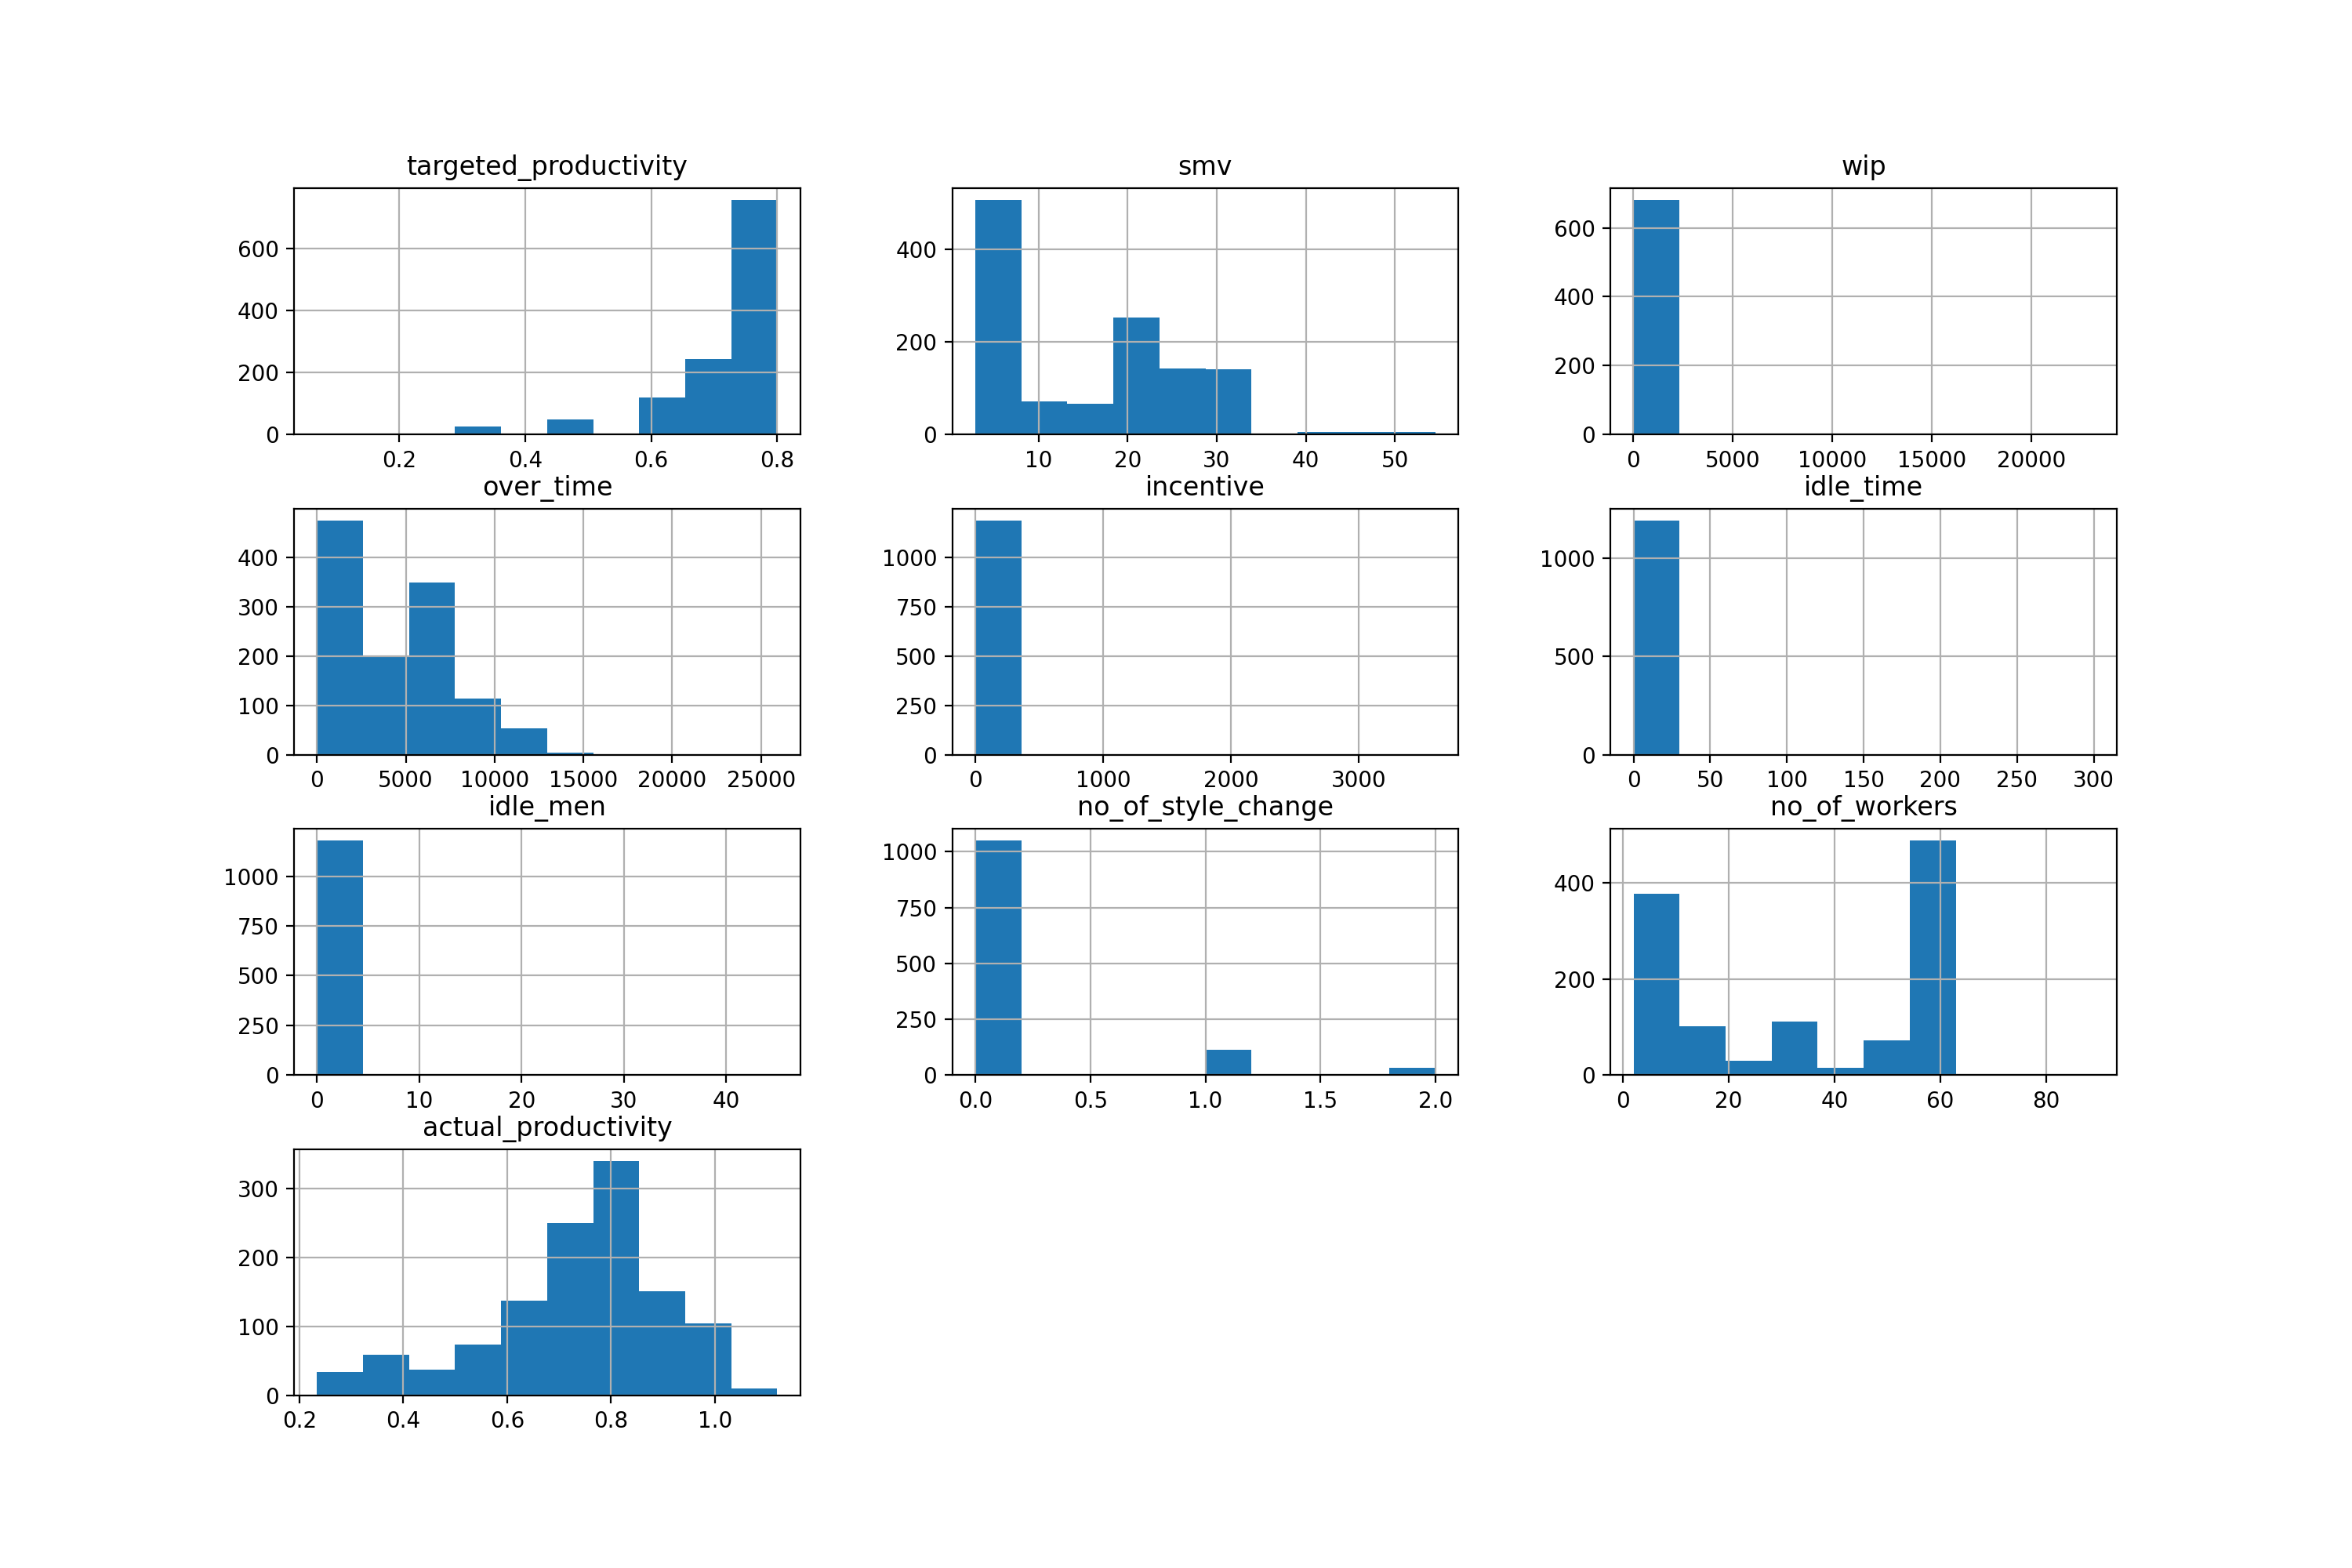

In [207]:
# Exibe a distribuição dos atributos utilizando histogramas
dataset[['targeted_productivity',
         'smv',
         'wip',
         'over_time',
         'incentive',
         'idle_time',
         'idle_men',
         'no_of_style_change',
         'no_of_workers',
         'actual_productivity']].hist(figsize = (15,10))
plt.show()

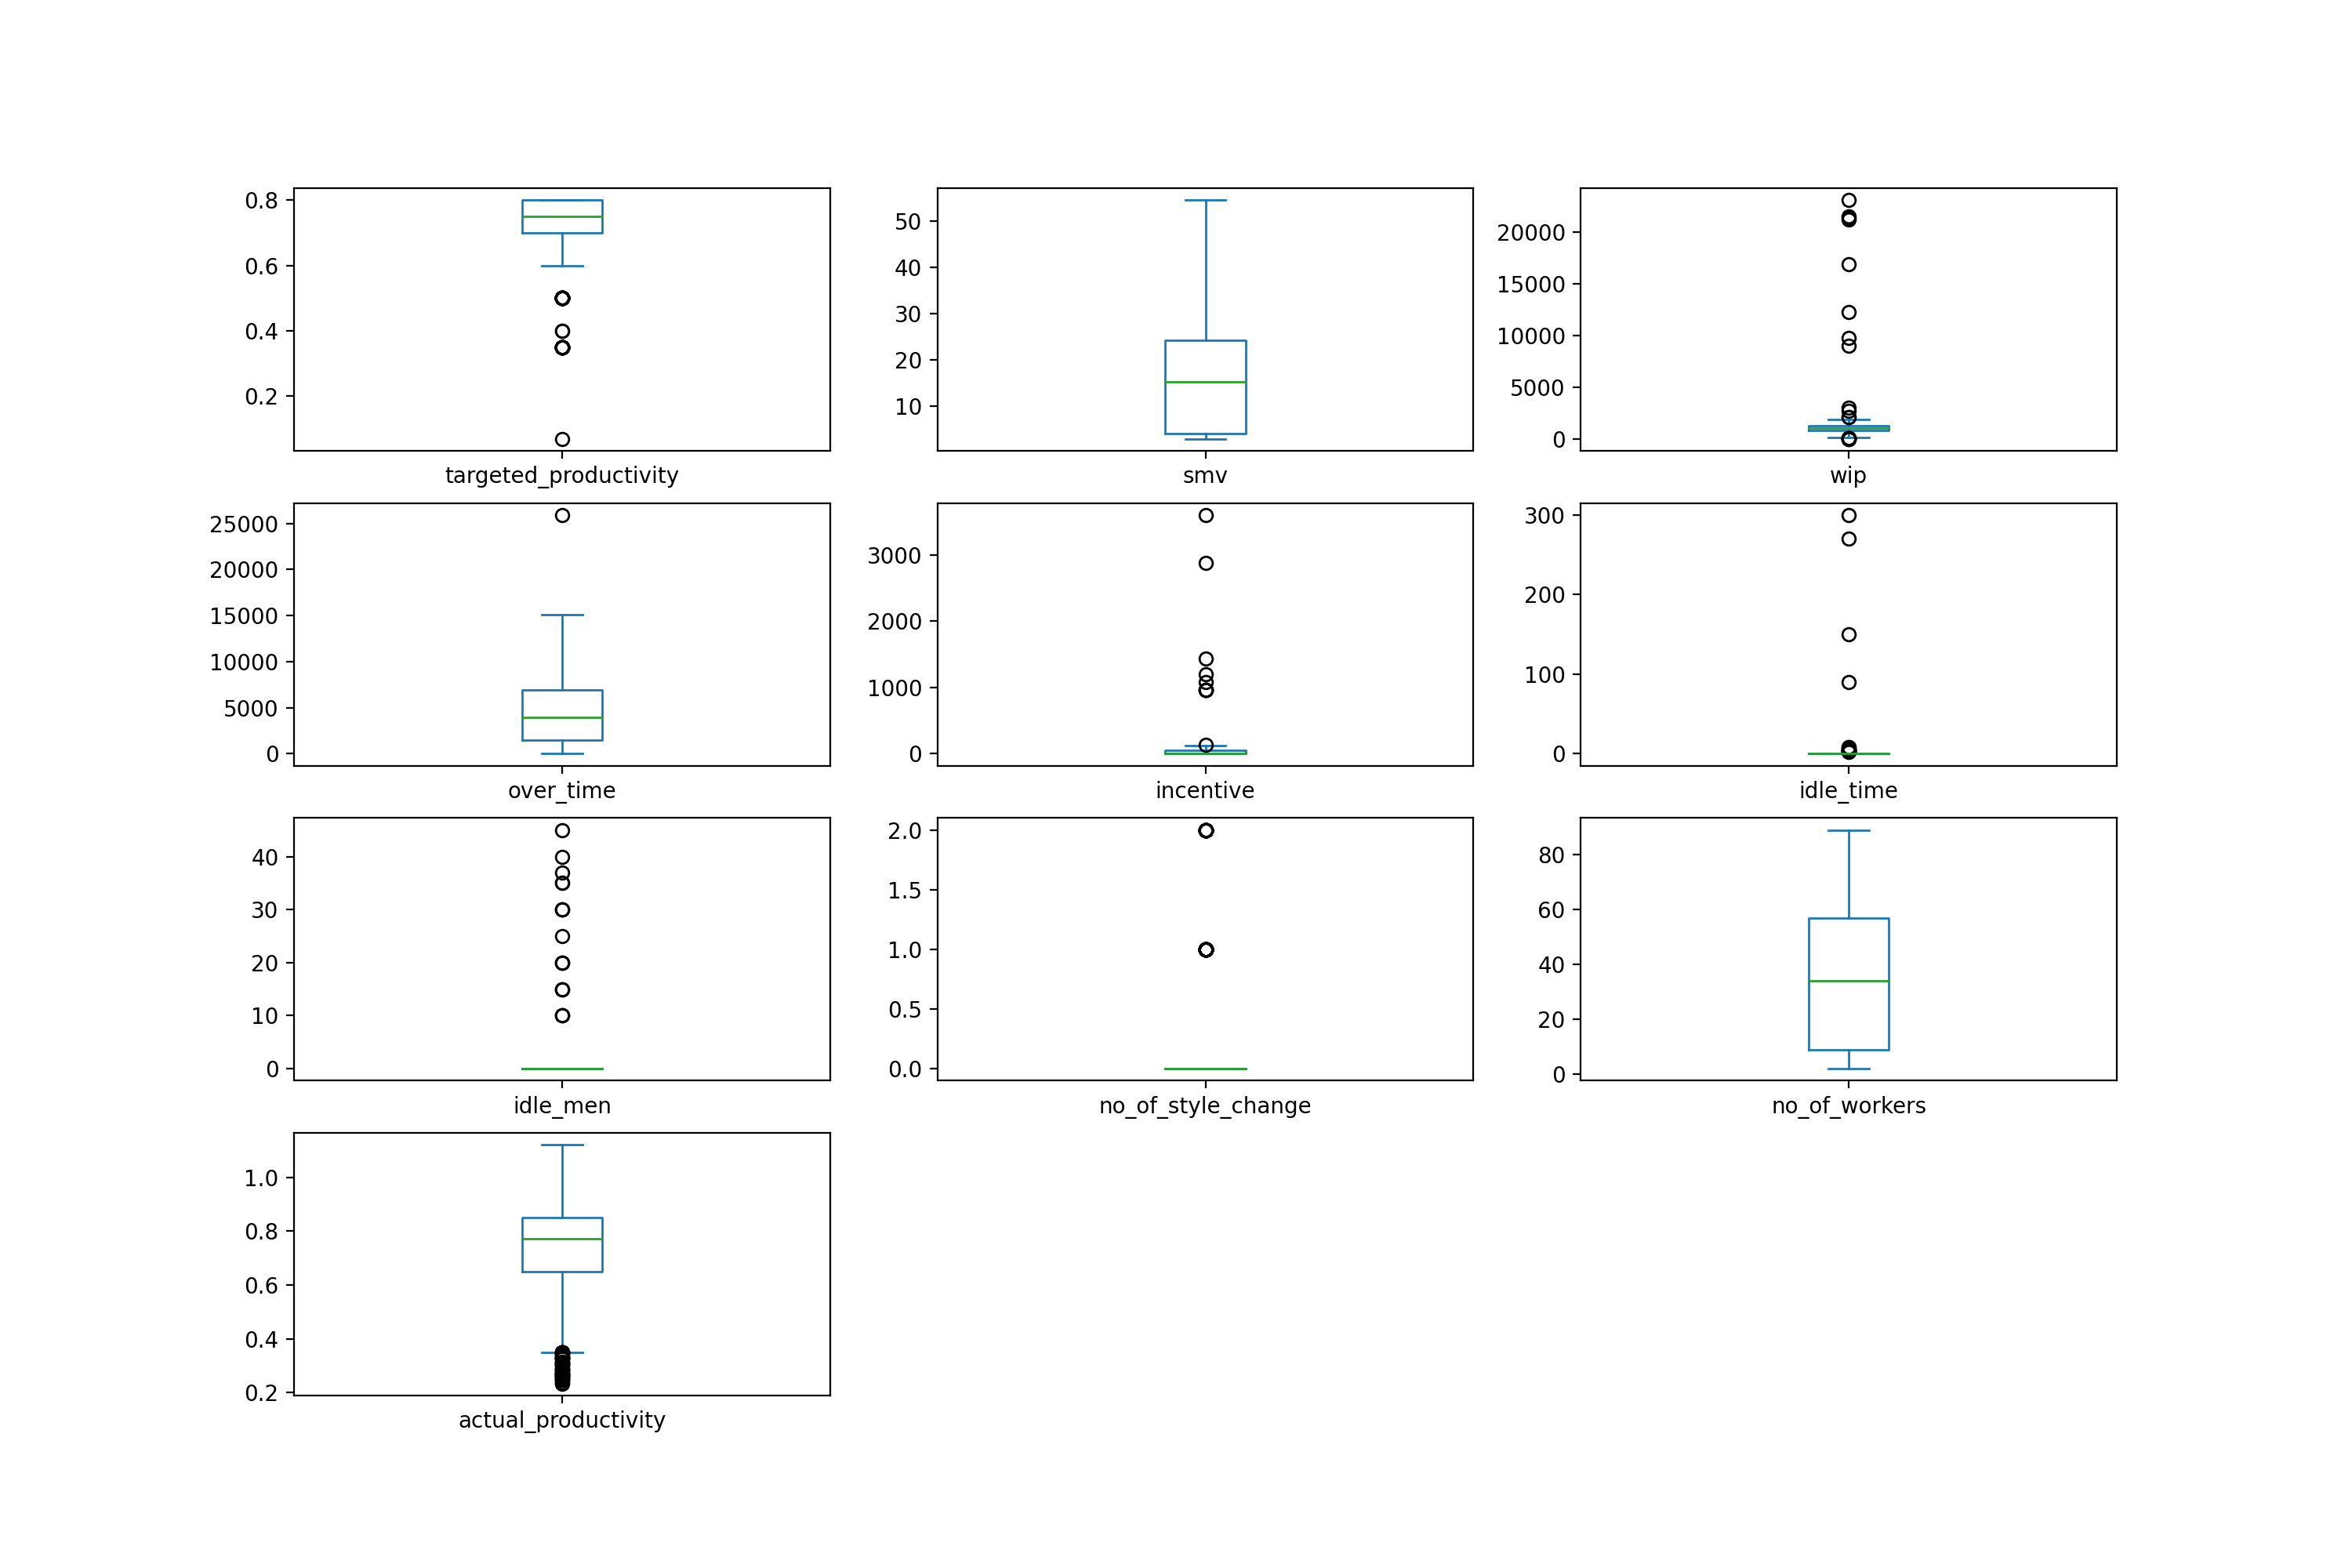

In [208]:
# Exibe a distribuição dos atributos utilizando boxplots
dataset[['targeted_productivity',
         'smv',
         'wip',
         'over_time',
         'incentive',
         'idle_time',
         'idle_men',
         'no_of_style_change',
         'no_of_workers',
         'actual_productivity']].plot(kind = 'box', subplots = True, layout = (4,3), sharey = False, figsize = (15,10))
plt.show()

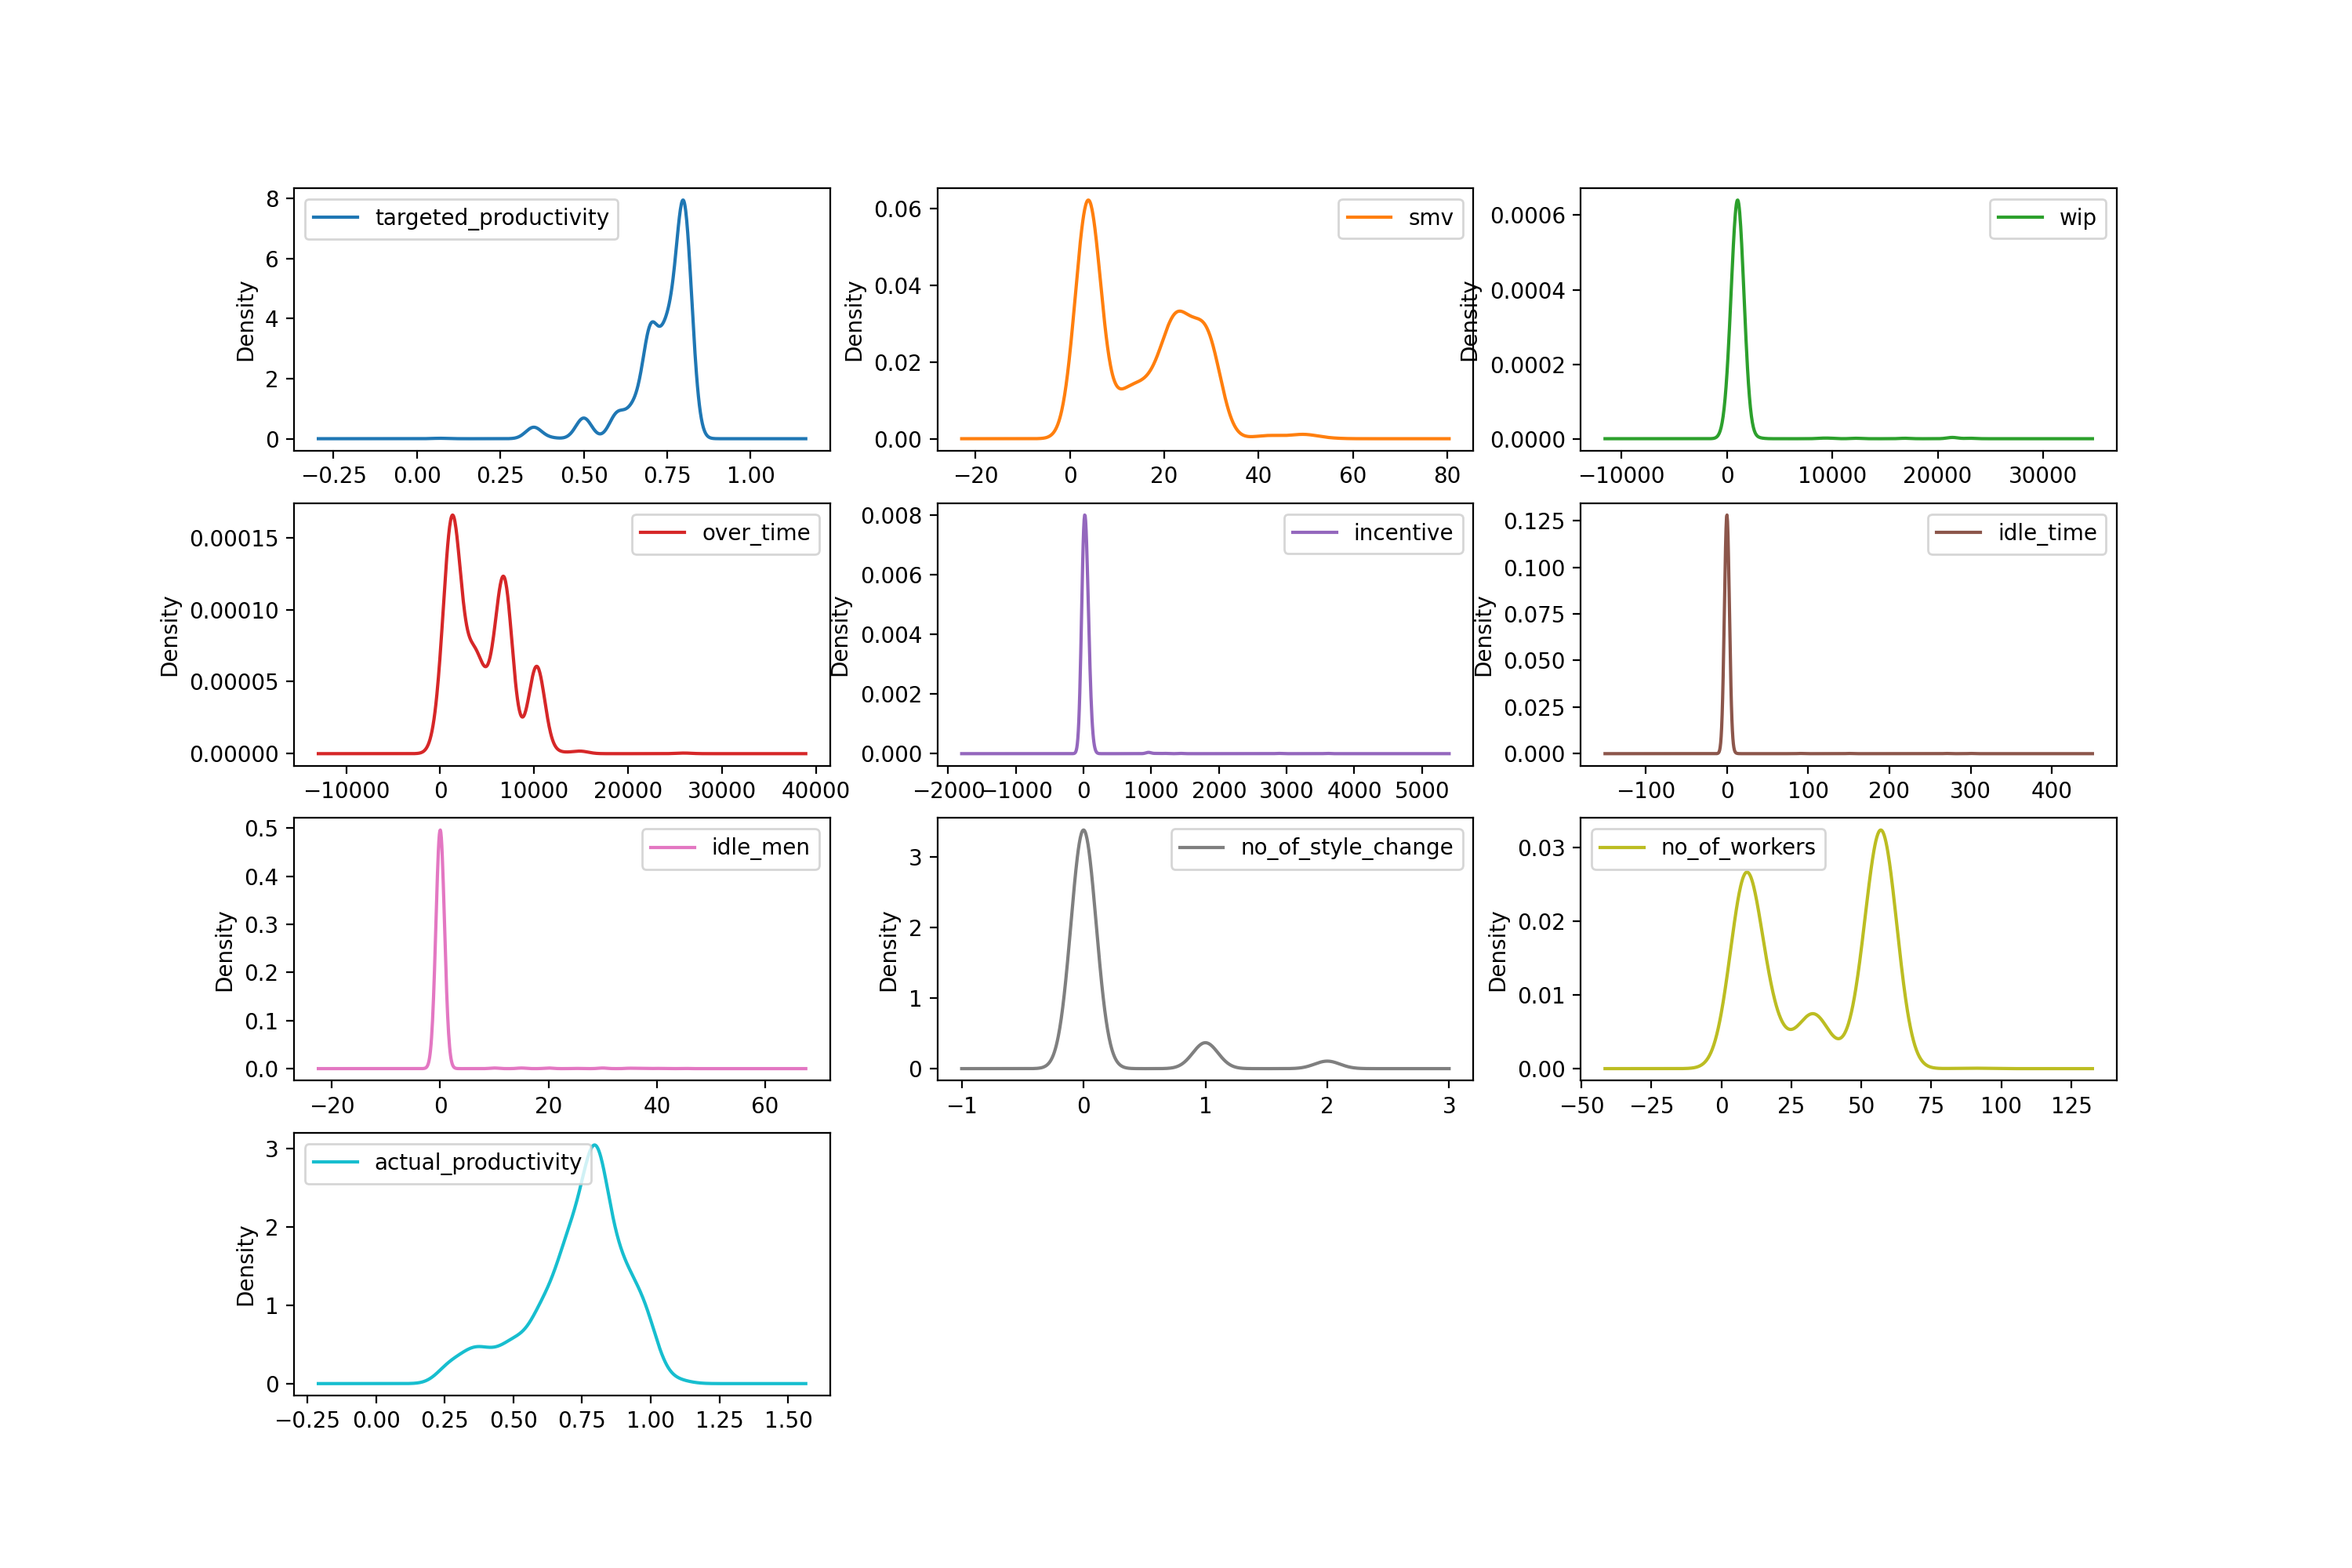

In [209]:
# Exibe a distribuição dos atributos utilizando density plot
dataset[['targeted_productivity',
         'smv',
         'wip',
         'over_time',
         'incentive',
         'idle_time',
         'idle_men',
         'no_of_style_change',
         'no_of_workers',
         'actual_productivity']].plot(kind = 'density', subplots = True, layout = (4,3), sharex = False, figsize = (15,10))
plt.show()

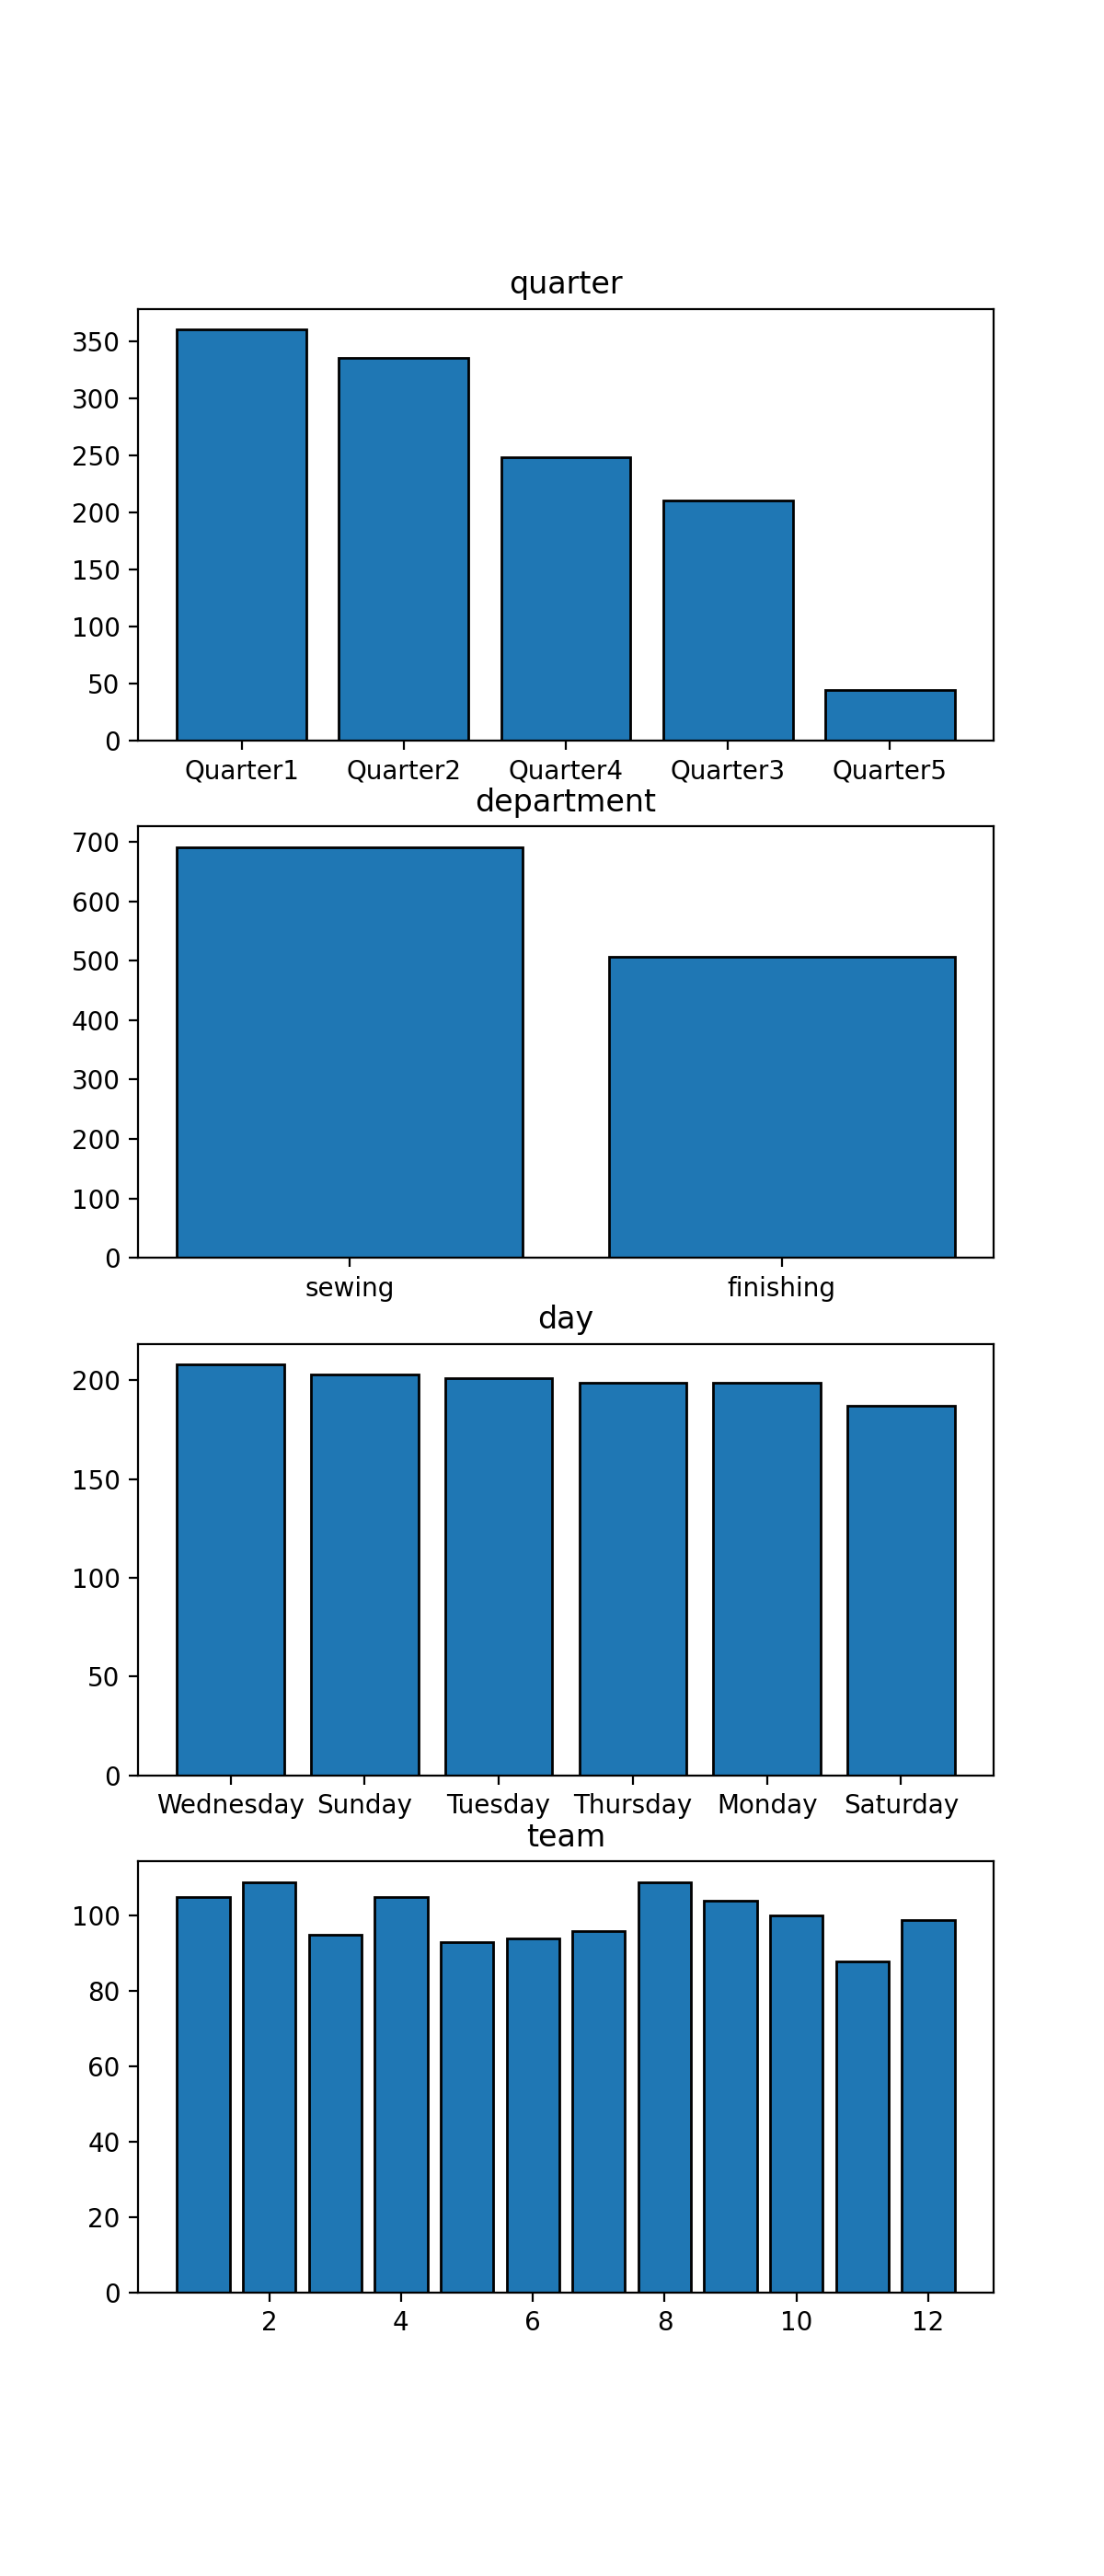

In [210]:
# Exibe a distribuição dos atributos utilizando gráficos de barra
fig, ax = plt.subplots(4,1, figsize = (6,14))

ax[0].bar(dataset['quarter'].value_counts().keys(),dataset['quarter'].value_counts(),edgecolor='black')
ax[0].set_title('quarter')

ax[1].bar(dataset['department'].value_counts().keys(),dataset['department'].value_counts(),edgecolor='black')
ax[1].set_title('department')

ax[2].bar(dataset['day'].value_counts().keys(),dataset['day'].value_counts(),edgecolor='black')
ax[2].set_title('day')

ax[3].bar(dataset['team'].value_counts().keys(),dataset['team'].value_counts(),edgecolor='black')
ax[3].set_title('team')

plt.show()

Avaliando os gráficos acima podemos considerar:
- A **target_productivity** apresenta o valor 0.80 com maior frequência.
- O **smv** (standard minute value), tem prevalencia de um valor em torno de 3 minutos. O valor em torno de 20 minutos também apresenta um frequência significante.
- O **wip** (work in progress), tem sua concentração em torno do valor 1000.
- O **over_time** tem uma concentração variando entre 950 e 1500 minutos.
- O **incentive** tem oferecimento 0 para a maior parte das instâncias.
- O **idle_time** é 0 na maior parte do dataset.
- O **idle_men** é 0 na maior parte do dataset. 
- O **no_of_style_changes** é 0 em quase a totalidade do dataset.
- O **no_of_workers** tem sua maior frequência entre 8 e 58, mas tem uma razoável variação.
- A **actual_productivity** apresenta uma certa uniformidade em torno do valor 0.80.
- Mais da metade da produção acontece durante os dois primeiros quartos do mês.
- As atividades de produção estão distribuidas igualmente ao longo da semana.
- O departamento finishing (acabamento), tem aproximandamente mais 200 tarefas que o departamento sewing (costura).
- As 12 equipes tem uma distribuição uniforme de trabalho. As equipes 8 e 2 tem o maior número de atividades.


Exibe a correlação entre os atributos.

In [211]:
# Exibe a correlação entre os atributos do dataset
dataset[['targeted_productivity',
         'smv',
         'wip',
         'over_time',
         'incentive',
         'idle_time',
         'idle_men',
         'no_of_style_change',
         'no_of_workers',
         'actual_productivity']].corr()

targeted_productivity       smv       wip  over_time  \
targeted_productivity               1.000000 -0.069489  0.062054  -0.088557   
smv                                -0.069489  1.000000 -0.037837   0.674887   
wip                                 0.062054 -0.037837  1.000000   0.022302   
over_time                          -0.088557  0.674887  0.022302   1.000000   
incentive                           0.032768  0.032629  0.167210  -0.004793   
idle_time                          -0.056181  0.056863 -0.026299   0.031038   
idle_men                           -0.053818  0.105901 -0.048718  -0.017913   
no_of_style_change                 -0.209294  0.315388 -0.072357   0.059790   
no_of_workers                      -0.084288  0.912176  0.030383   0.734164   
actual_productivity                 0.421594 -0.122089  0.131147  -0.054206   

                       incentive  idle_time  idle_men  no_of_style_change  \
targeted_productivity   0.032768  -0.056181 -0.053818           -0.209294   
smv                     0.032629   0.056863  0.105901            0.315388   
wip                     0.167210  -0.026299 -0.048718           -0.072357   
over_time              -0.004793   0.031038 -0.017913            0.059790   
incentive               1.000000  -0.012024 -0.021140           -0.026607   
idle_time              -0.012024   1.000000  0.559146           -0.011598   
idle_men               -0.021140   0.559146  1.000000            0.133632   
no_of_style_change     -0.026607  -0.011598  0.133632            1.000000   
no_of_workers           0.049222   0.058049  0.106946            0.327787   
actual_productivity     0.076538  -0.080851 -0.181734           -0.207366   

                       no_of_workers  actual_productivity  
targeted_productivity      -0.084288             0.421594  
smv                         0.912176            -0.122089  
wip                         0.030383             0.131147  
over_time                   0.734164            -0.054206  
incentive                   0.049222             0.076538  
idle_time                   0.058049            -0.080851  
idle_men                    0.106946            -0.181734  
no_of_style_change          0.327787            -0.207366  
no_of_workers               1.000000            -0.057991  
actual_productivity        -0.057991             1.000000

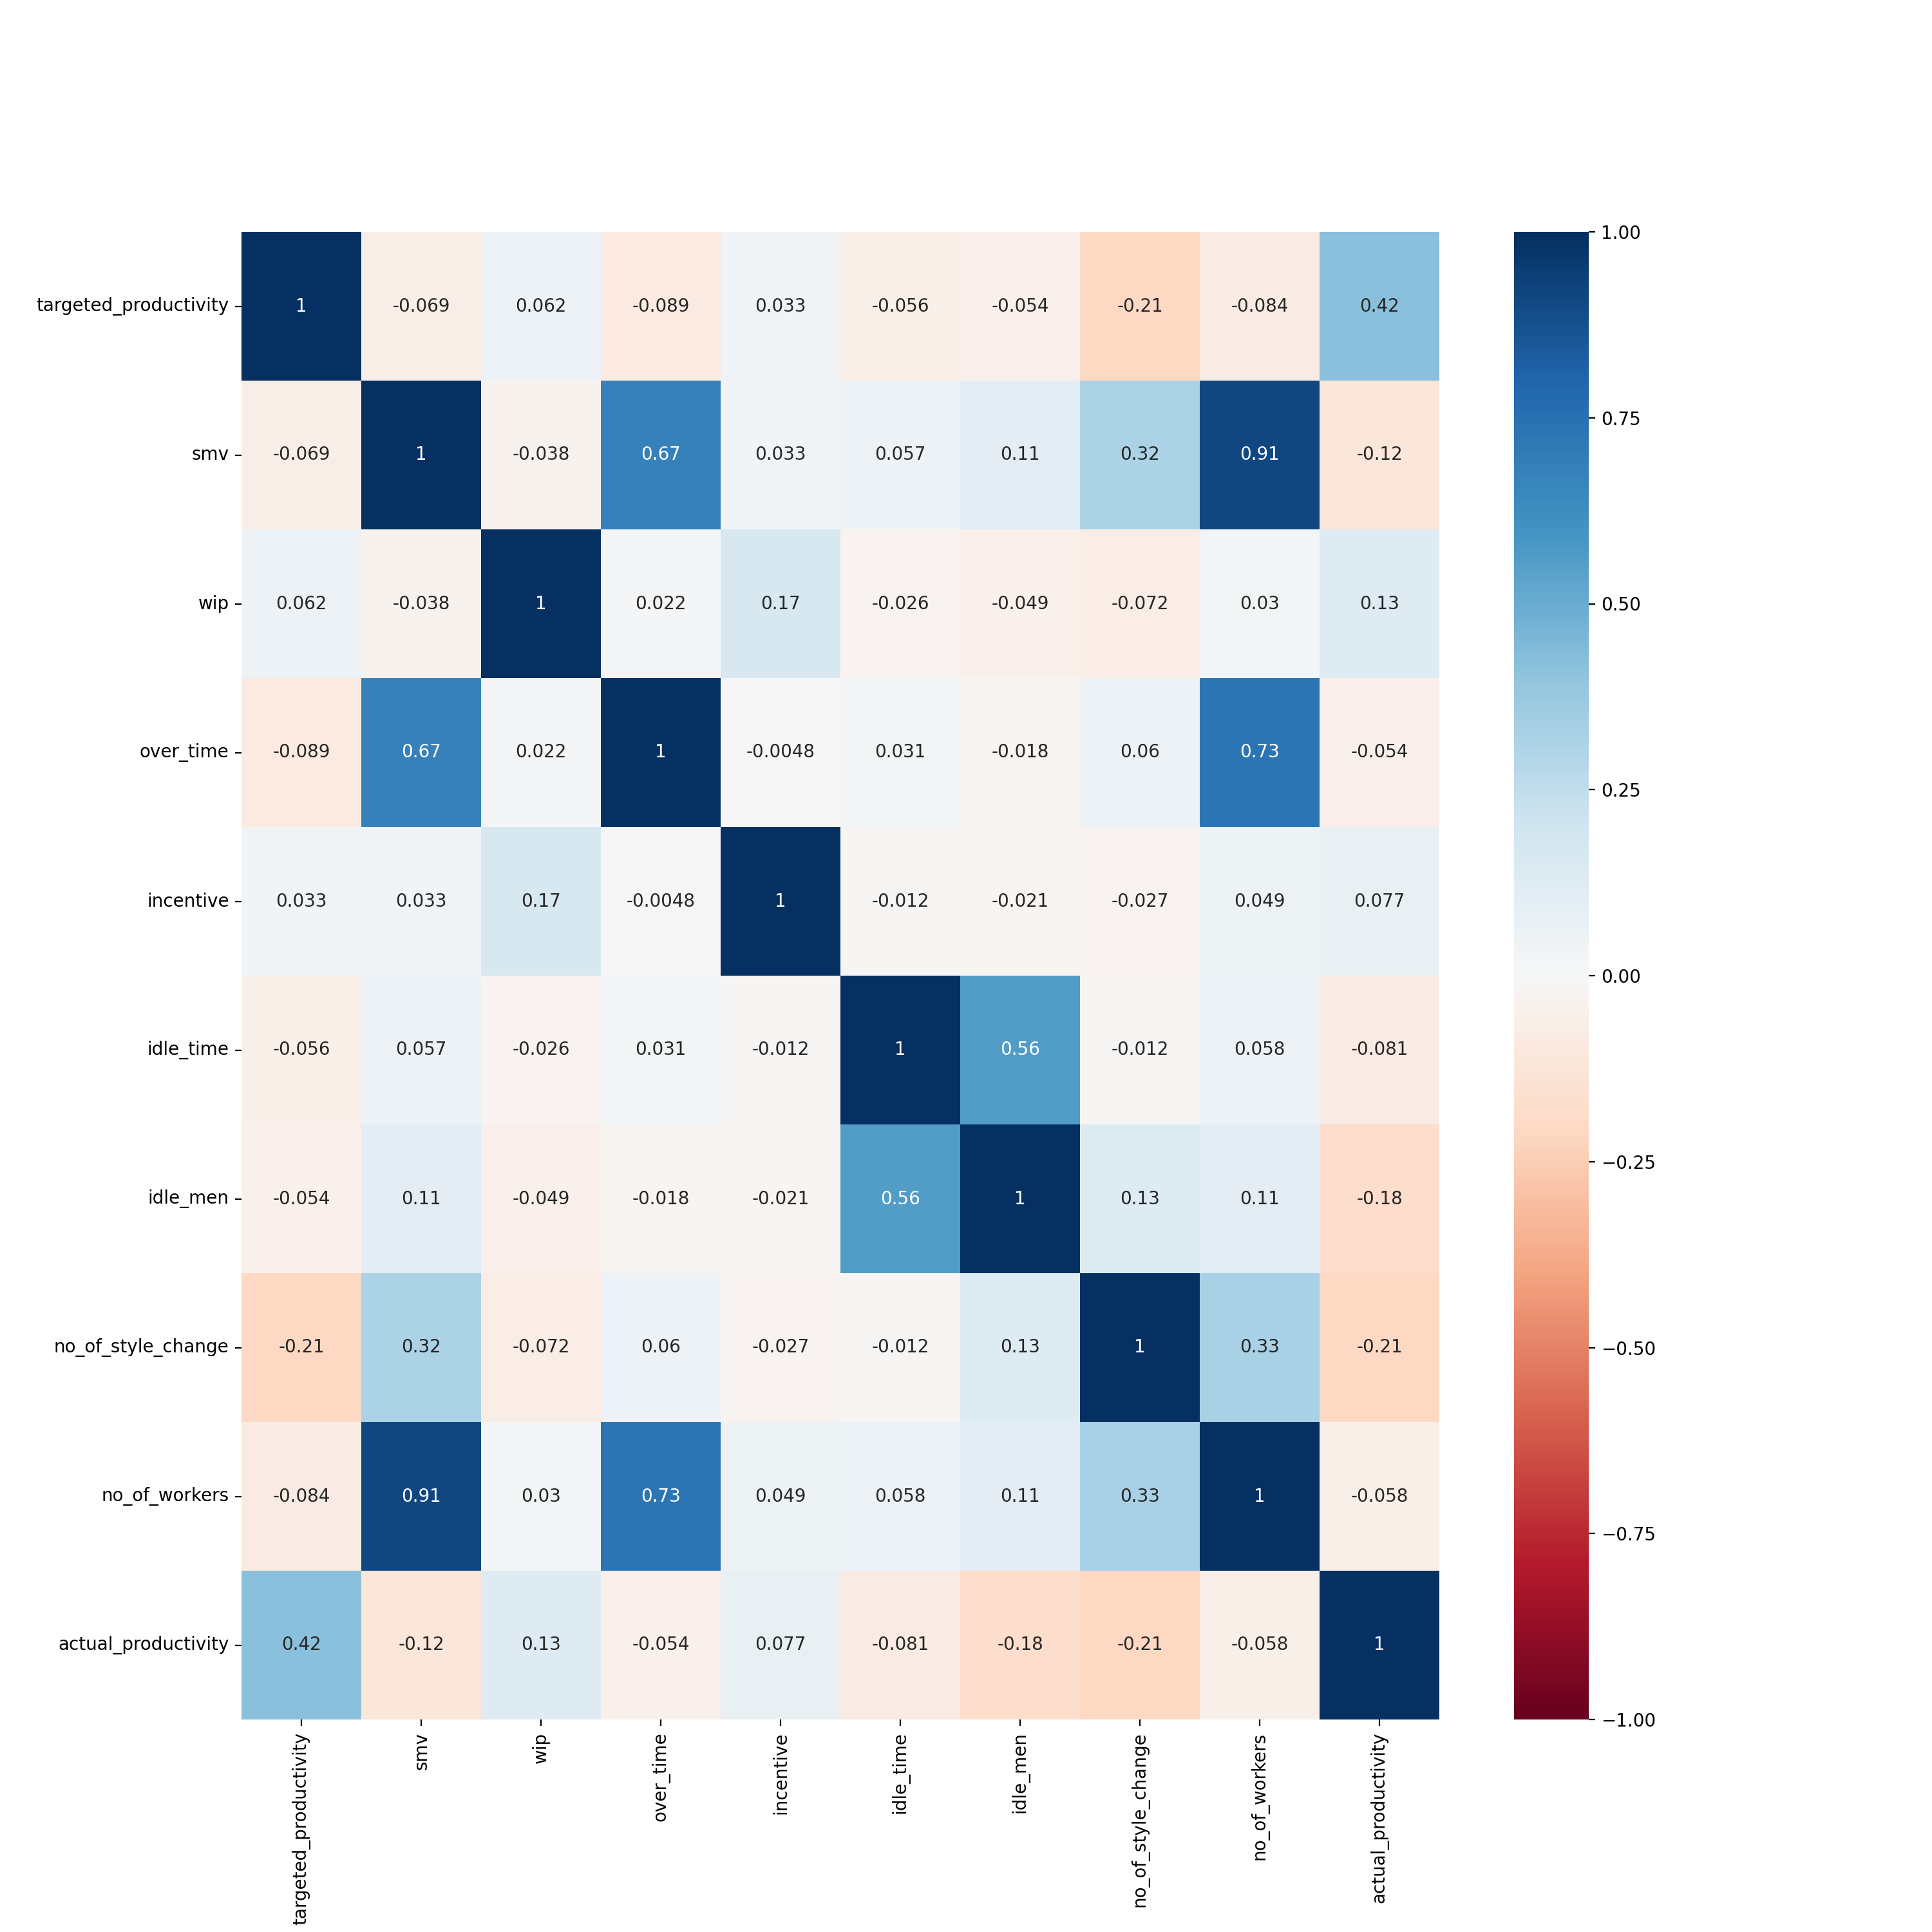

In [212]:
# Exibe a matriz de correlação
plt.figure(figsize = (15,15))
sns.heatmap(dataset[['targeted_productivity',
                     'smv',
                     'wip',
                     'over_time',
                     'incentive',
                     'idle_time',
                     'idle_men',
                     'no_of_style_change',
                     'no_of_workers',
                     'actual_productivity']].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.show()

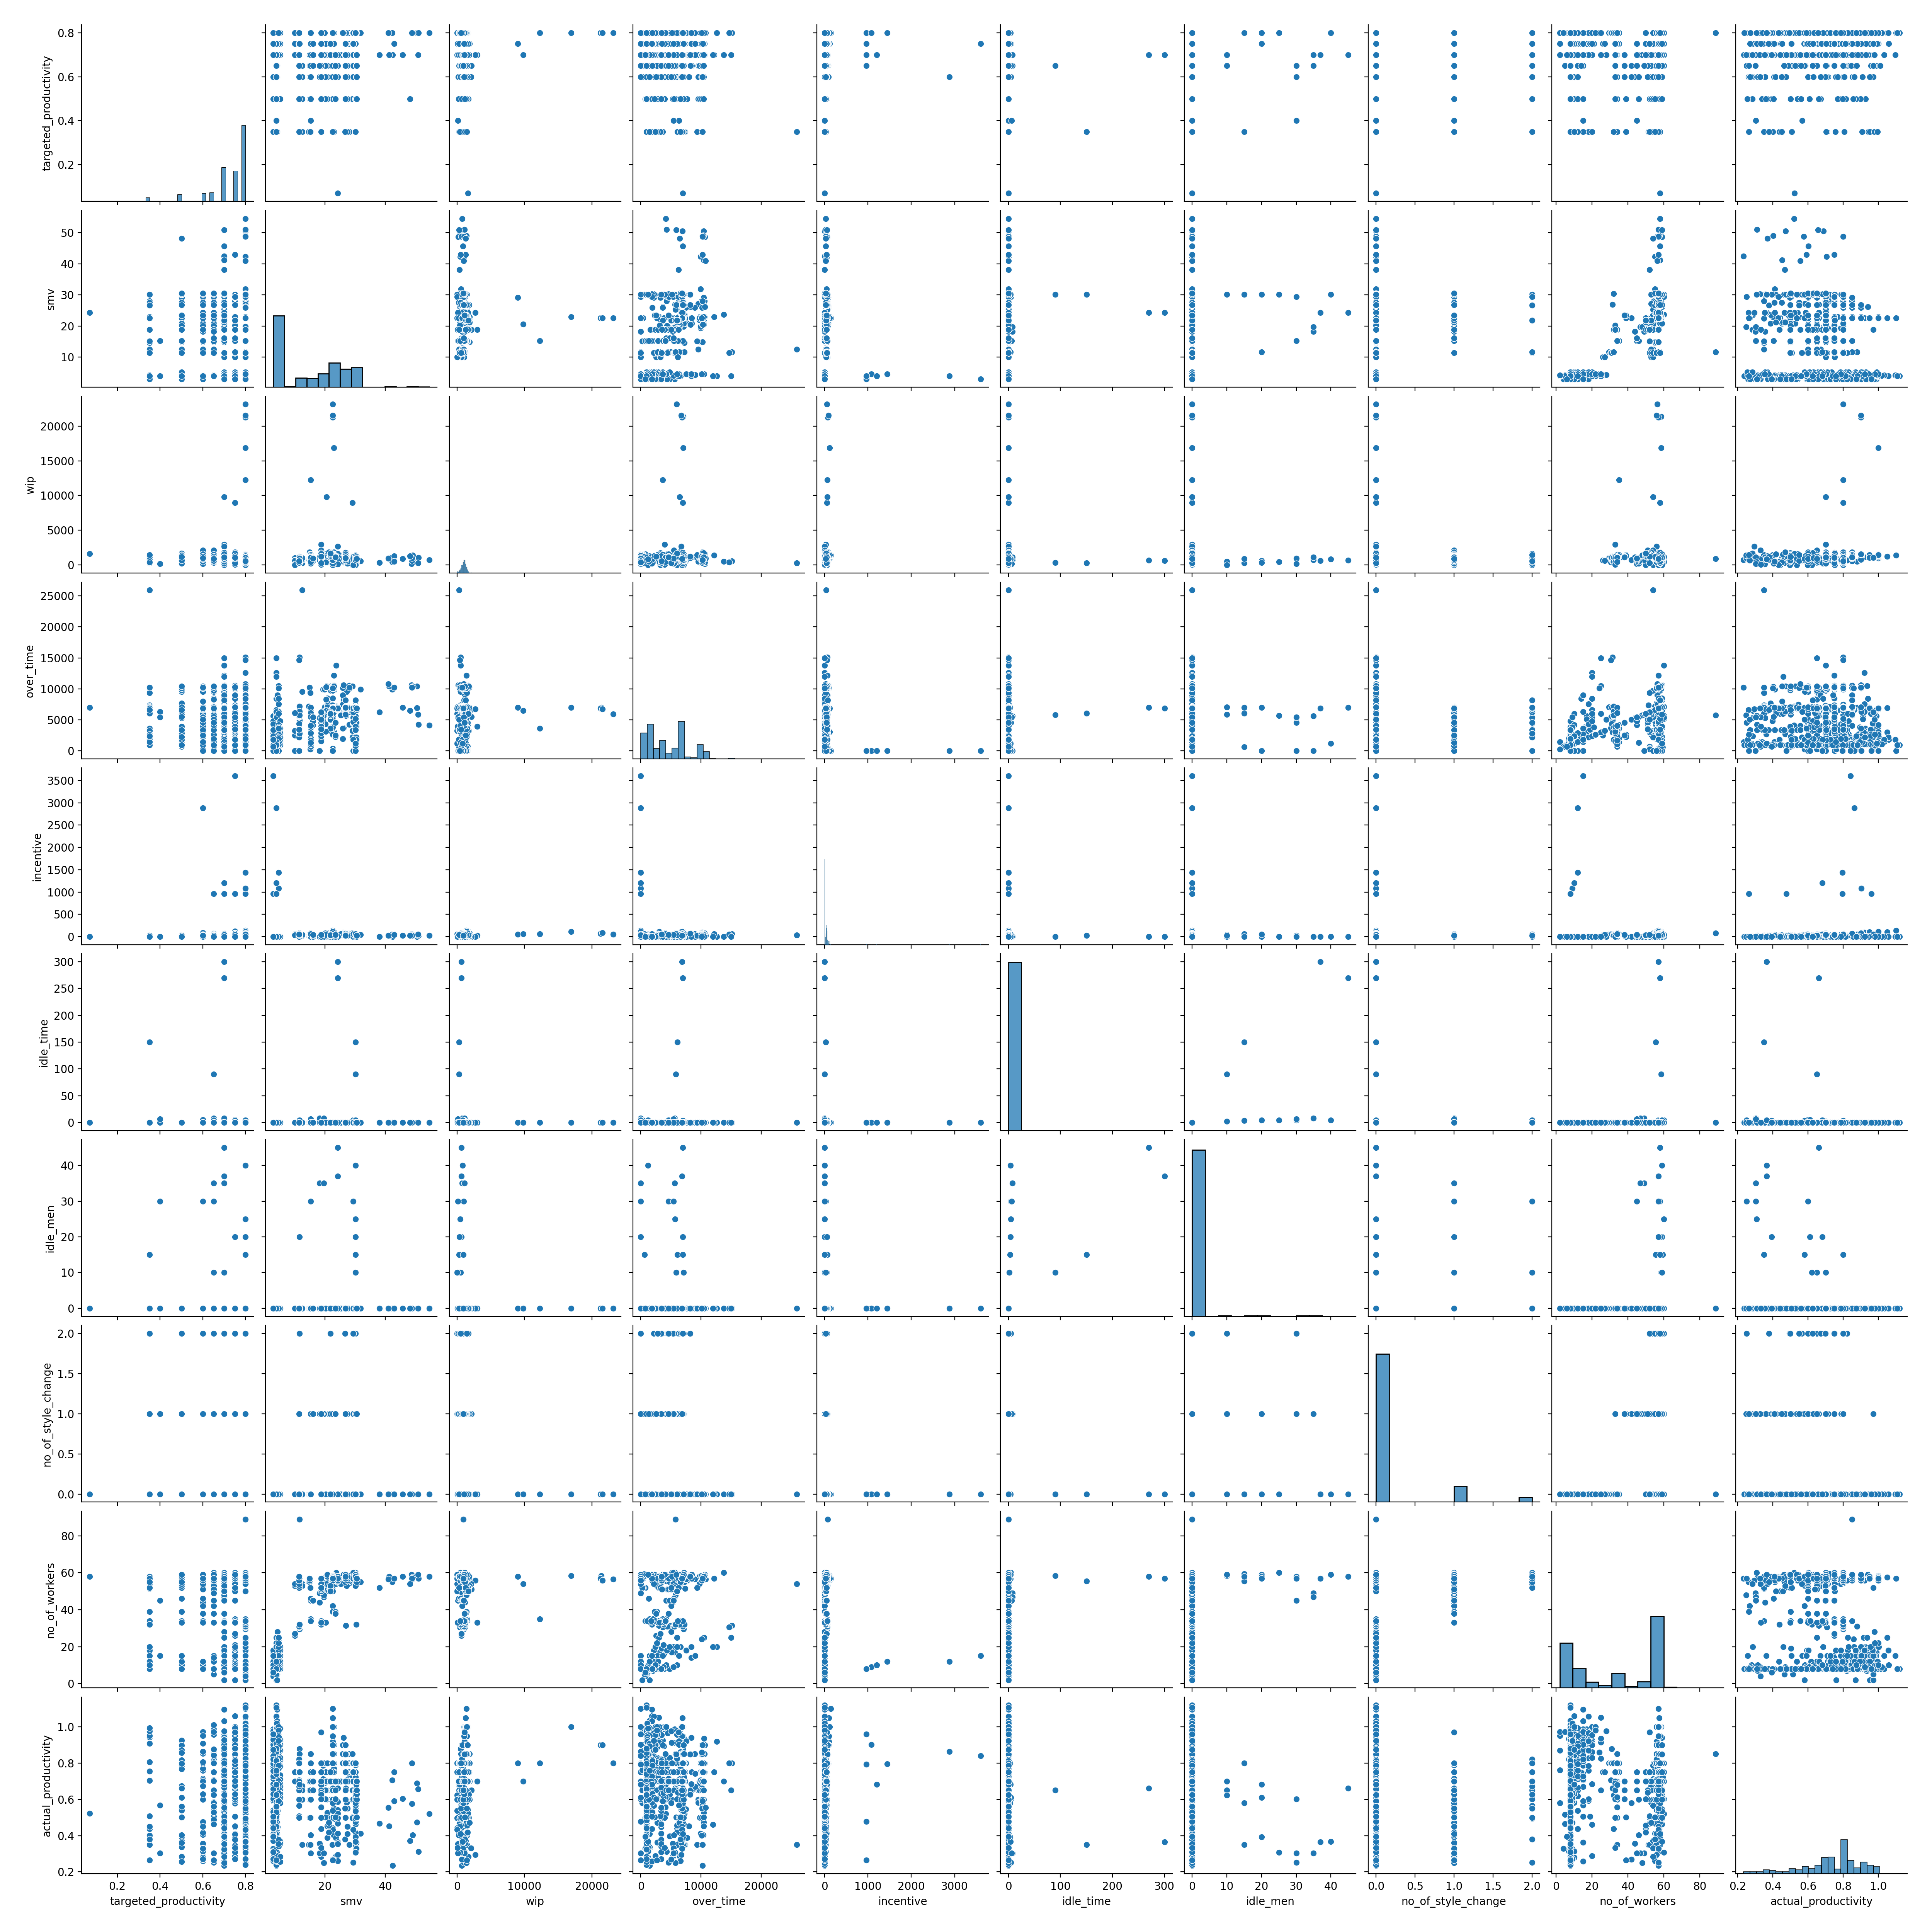

In [213]:
# Exibe o scatter plot a partir dos dados do dataset
sns.pairplot(dataset[['targeted_productivity',
                      'smv',
                      'wip',
                      'over_time',
                      'incentive',
                      'idle_time',
                      'idle_men',
                      'no_of_style_change',
                      'no_of_workers',
                      'actual_productivity']])

Avaliando o resultado da correlação entre alguns atributos:
- Pode ser identificada uma correlação positiva (0.91) entre o atributo **smv** (standard minute value) e o **no_of_workers**. Isto está relacionado a necessidade de um número maior de trabalhadores para as tarefas mais longas. Essa foi a correlação mais alta identificada. Ela se justifica pois quanto maior o tempo de uma tarefa, mais trabalhadores são alocados à tarefa.
- Temos uma correlação positiva (0.67) entre o atributo **smv** (standard minute value) e o **overtime**.
- Pode ser identificada uma correlação positiva (0.67) entre o atributo **overtime** e o **no_of_workers**. Isto ocorre porque um atraso numa tarefa pode ser compensada com a alocação de mais trabalhadores à mesma.
- A correlação entre **idle_time** e **idle_men** é positiva (0.56). Esse resultado se dá porque uma linha de produção interrompida leva a trabalhadores ociosos.

Exibe a relação entre o atributo **actual_productivity**, e os atributos **day**, **quarter**, **department** e **targeted_productivity**.

In [214]:
# Importa bibliotecas
from plotnine.data import huron
from plotnine import ggplot, aes, geom_boxplot

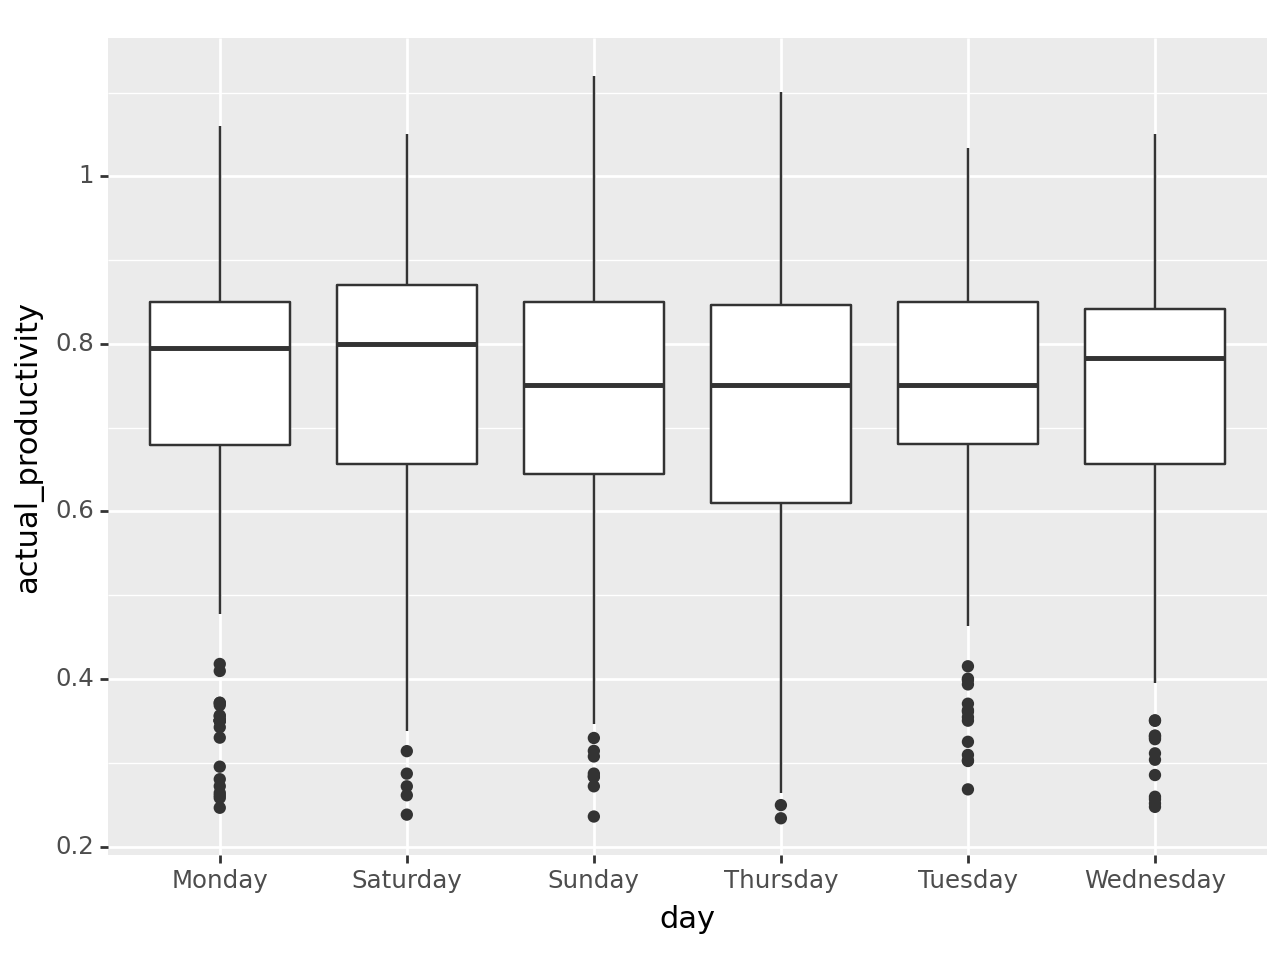

<Figure Size: (640 x 480)>

In [215]:
# Exibe boxplot relacionando o atributo actual_productivity ao atributo day
(
  ggplot(dataset)
  + aes(x="day", y="actual_productivity")
  + geom_boxplot()
)

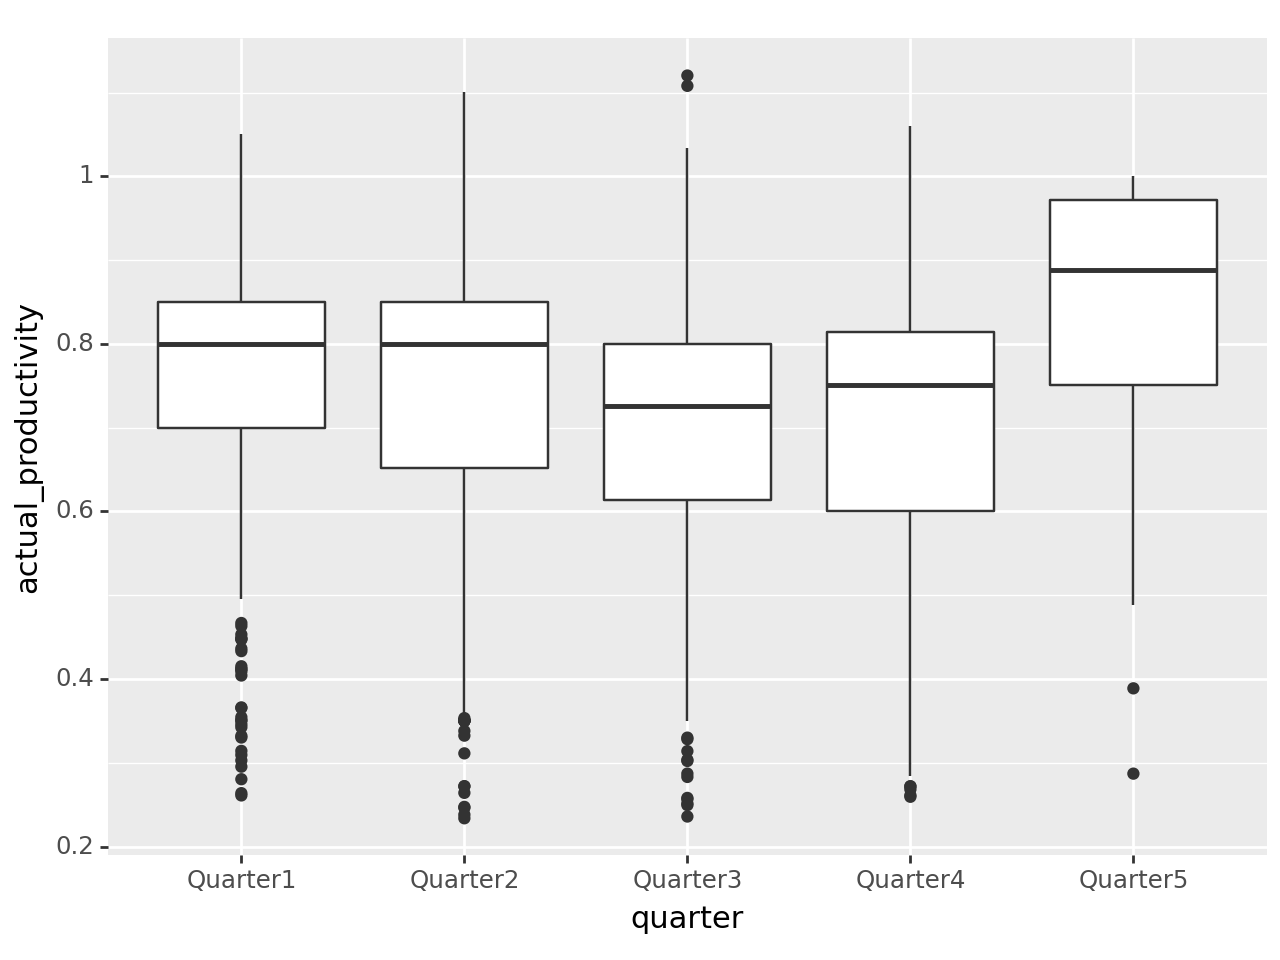

<Figure Size: (640 x 480)>

In [216]:
# Exibe boxplot relacionando o atributo actual_productivity ao atributo quarter
(
  ggplot(dataset)
  + aes(x="quarter", y="actual_productivity")
  + geom_boxplot()
)

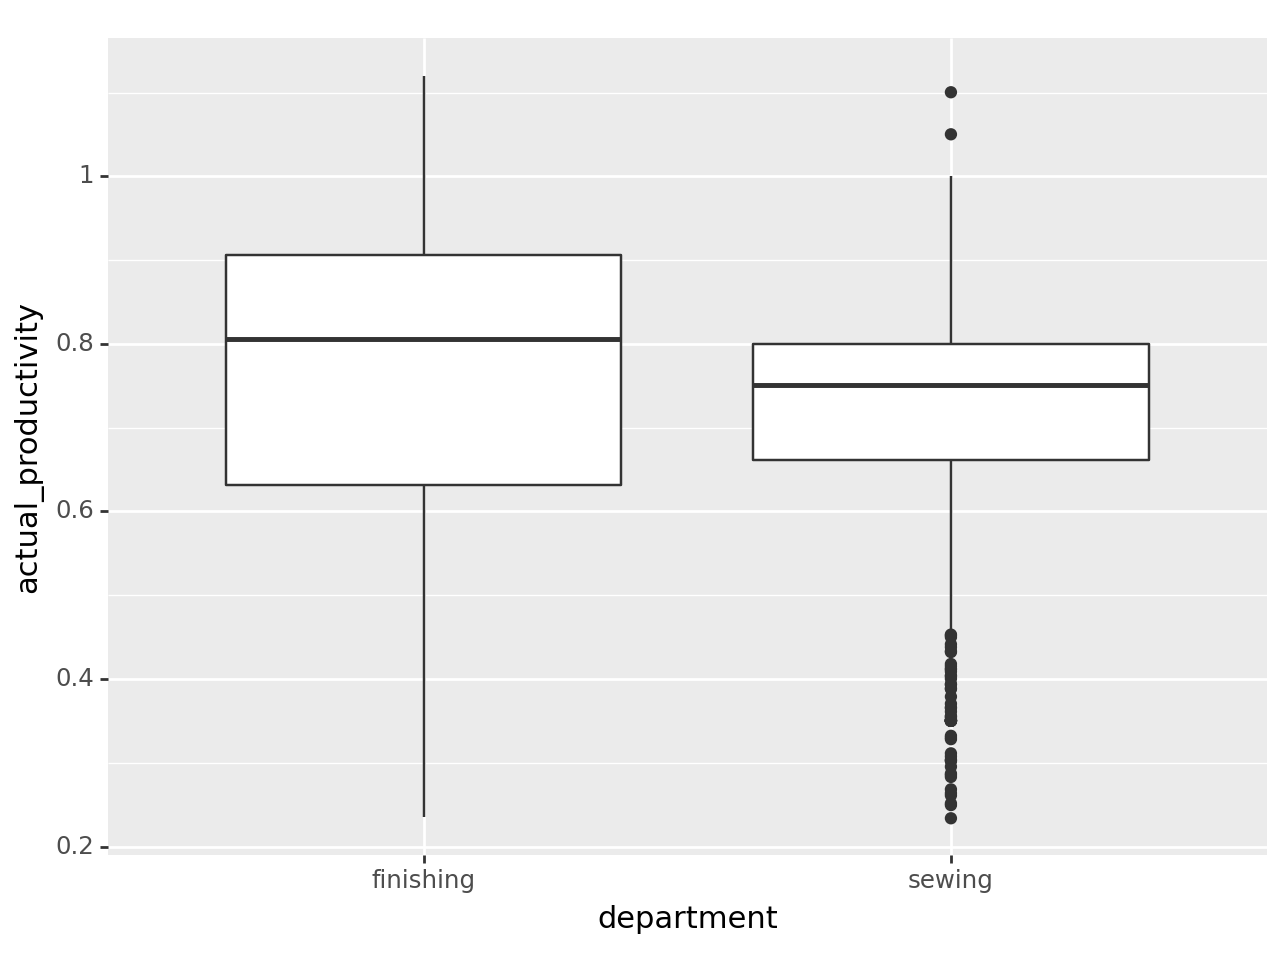

<Figure Size: (640 x 480)>

In [217]:
# Exibe boxplot relacionando o atributo actual_productivity ao atributo department
(
  ggplot(dataset)
  + aes(x="department", y="actual_productivity")
  + geom_boxplot()
)


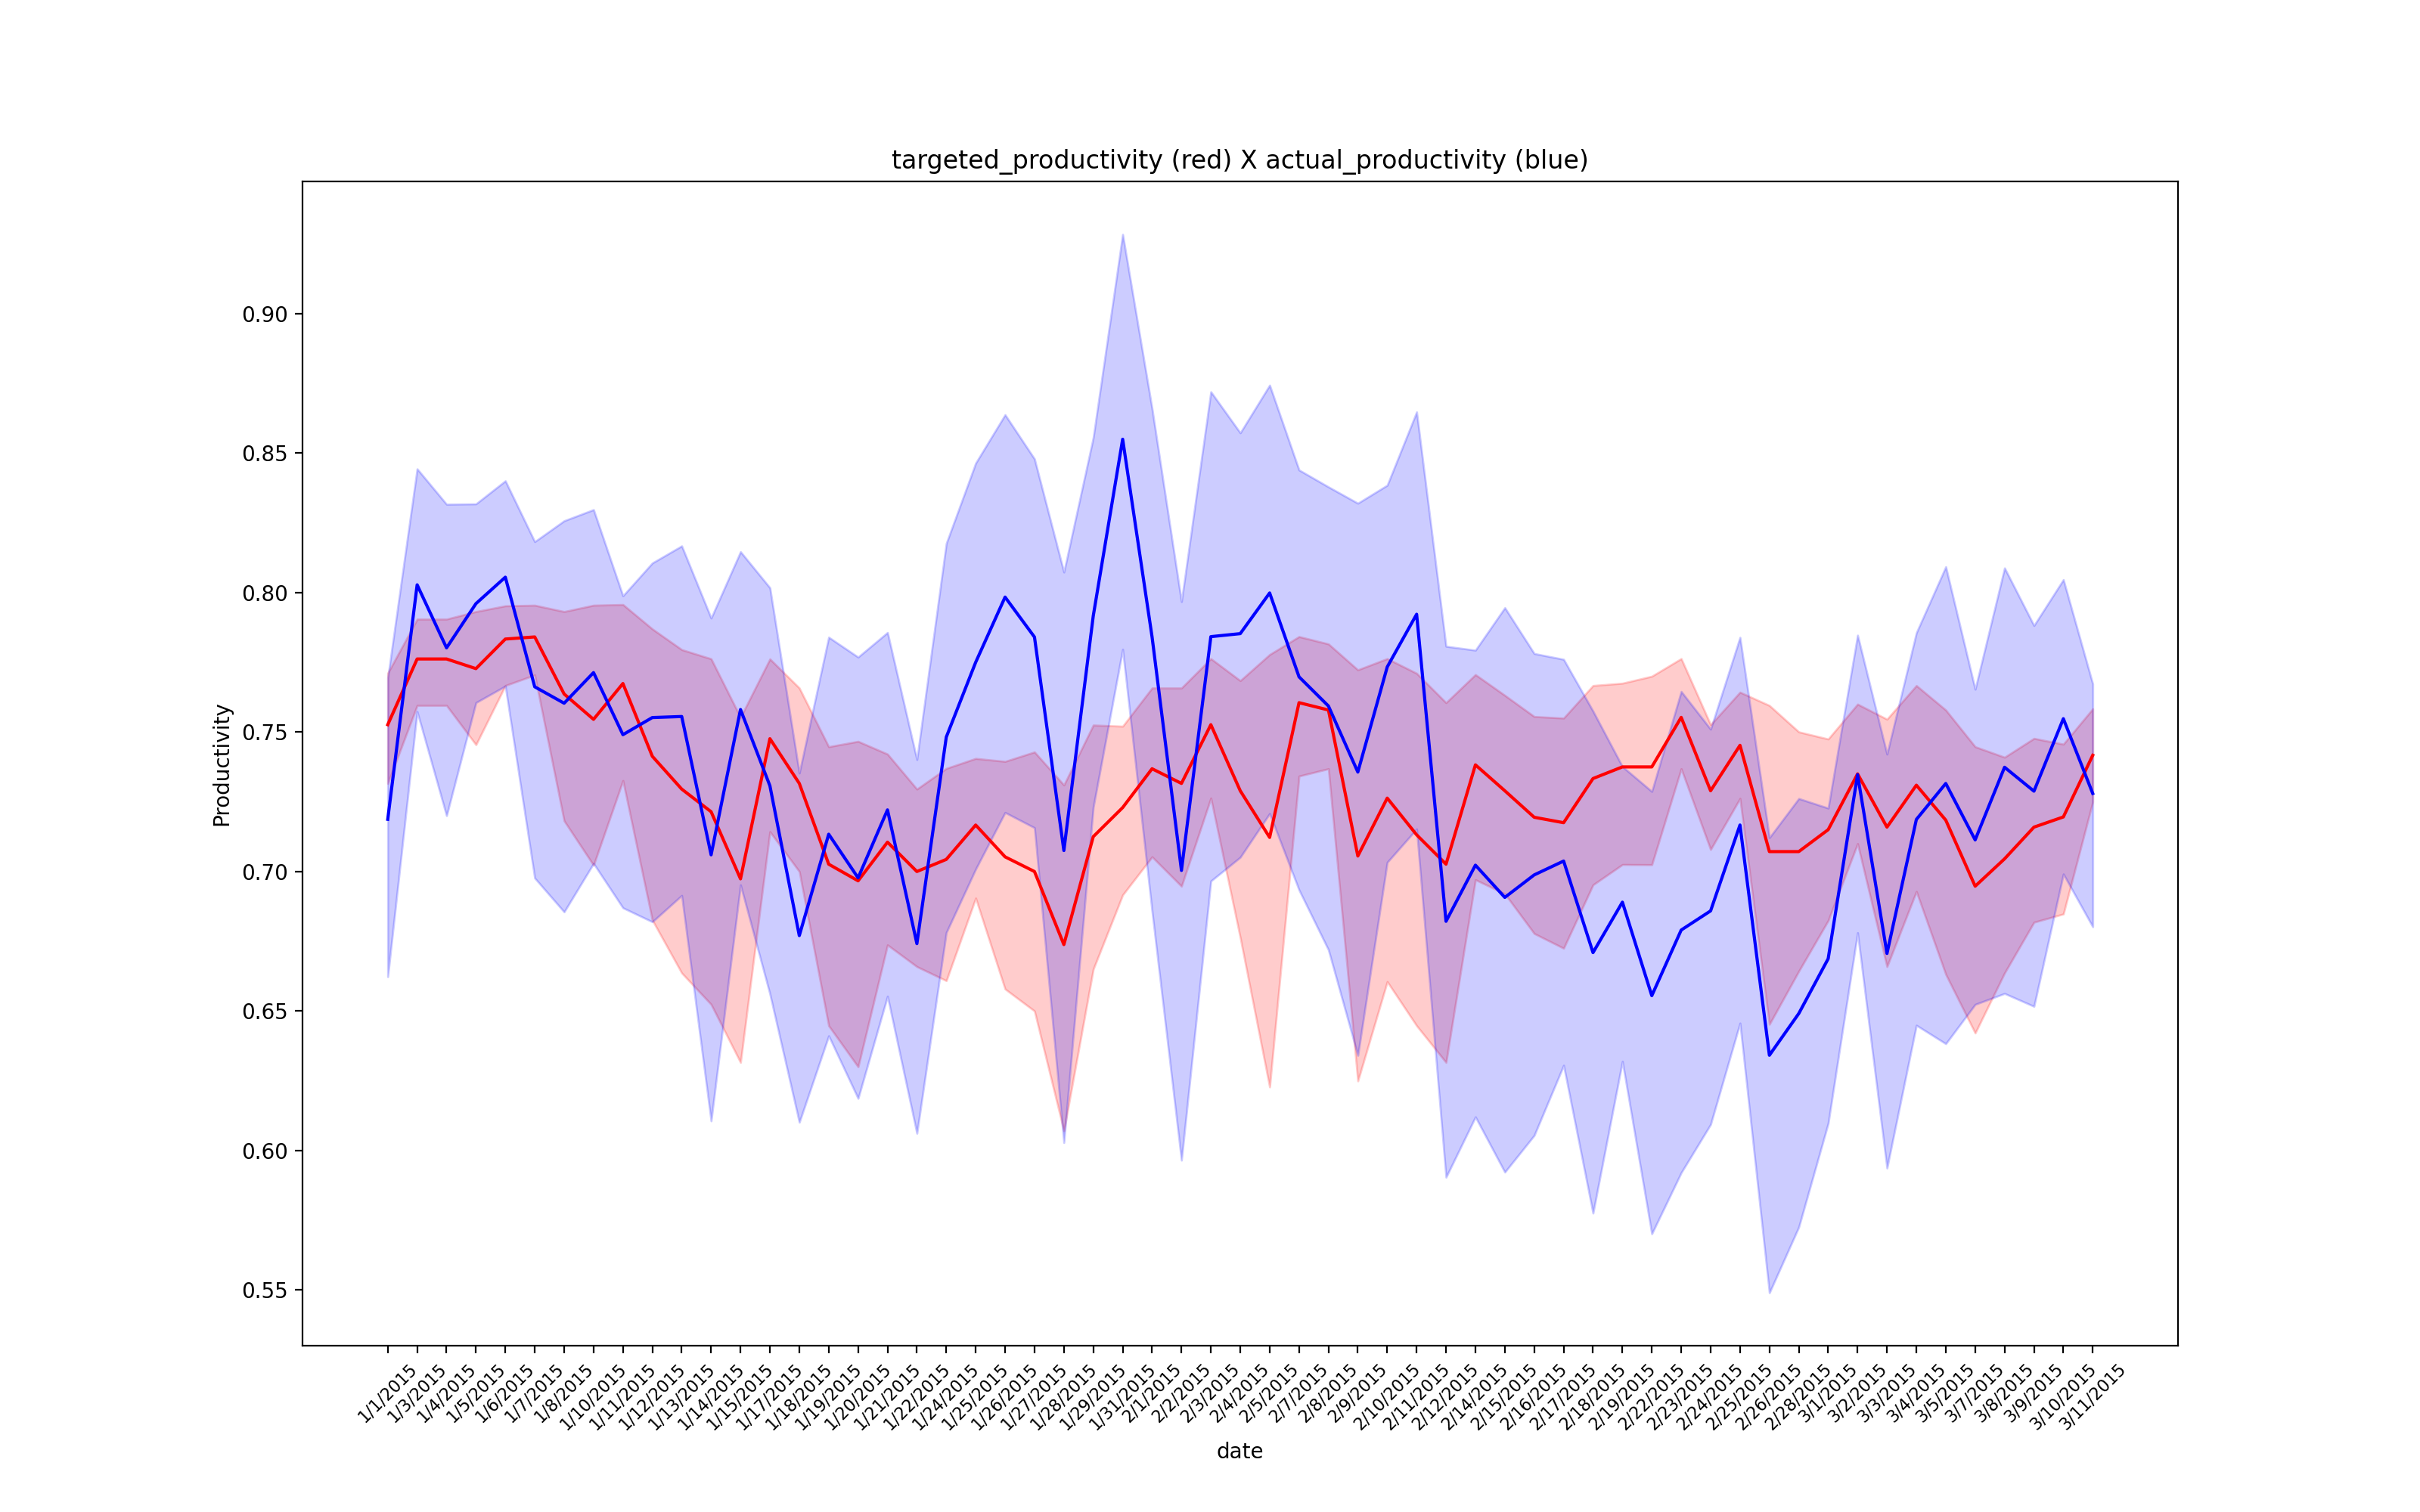

In [218]:
# Exibe gráfico relacionando o atributo actual_productivity ao atributo targeted_productivity
plt.figure(figsize=(16,10))

ax=sns.lineplot(data=dataset, x='date',y='targeted_productivity',color="red")
ax=sns.lineplot(data=dataset, x='date',y='actual_productivity',color="blue")
ax.set(ylabel='Productivity', title="targeted_productivity (red) X actual_productivity (blue)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,size=8)

plt.show()

Avaliando a relação entre o atributo **actual_productivity**, e os atributos **day**, **quarter**, **department** e **targeted_productivity**.
- A **actual_productivity** é constante ao longo dos dias.
- O quinto quarter tem a maior **actual_productivity**.
- A **actual_productivity** aparenta ser bastante semelhante entre os dois departments (finishing e sewing), apesar do departamento sewing ter mais outliers.
- O gráfico 'targeted productivity X actual productivity' mostra que a **actual productivity** tem maior variação e é maior que a **targeted productivity** na maior parte da amostra.

### Pré-processamento de Dados

#### Tratamento de missings

In [219]:
# Verifica nulls no dataset
dataset.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

Foram encontrados missings no atributo **wip** .

<Axes: >

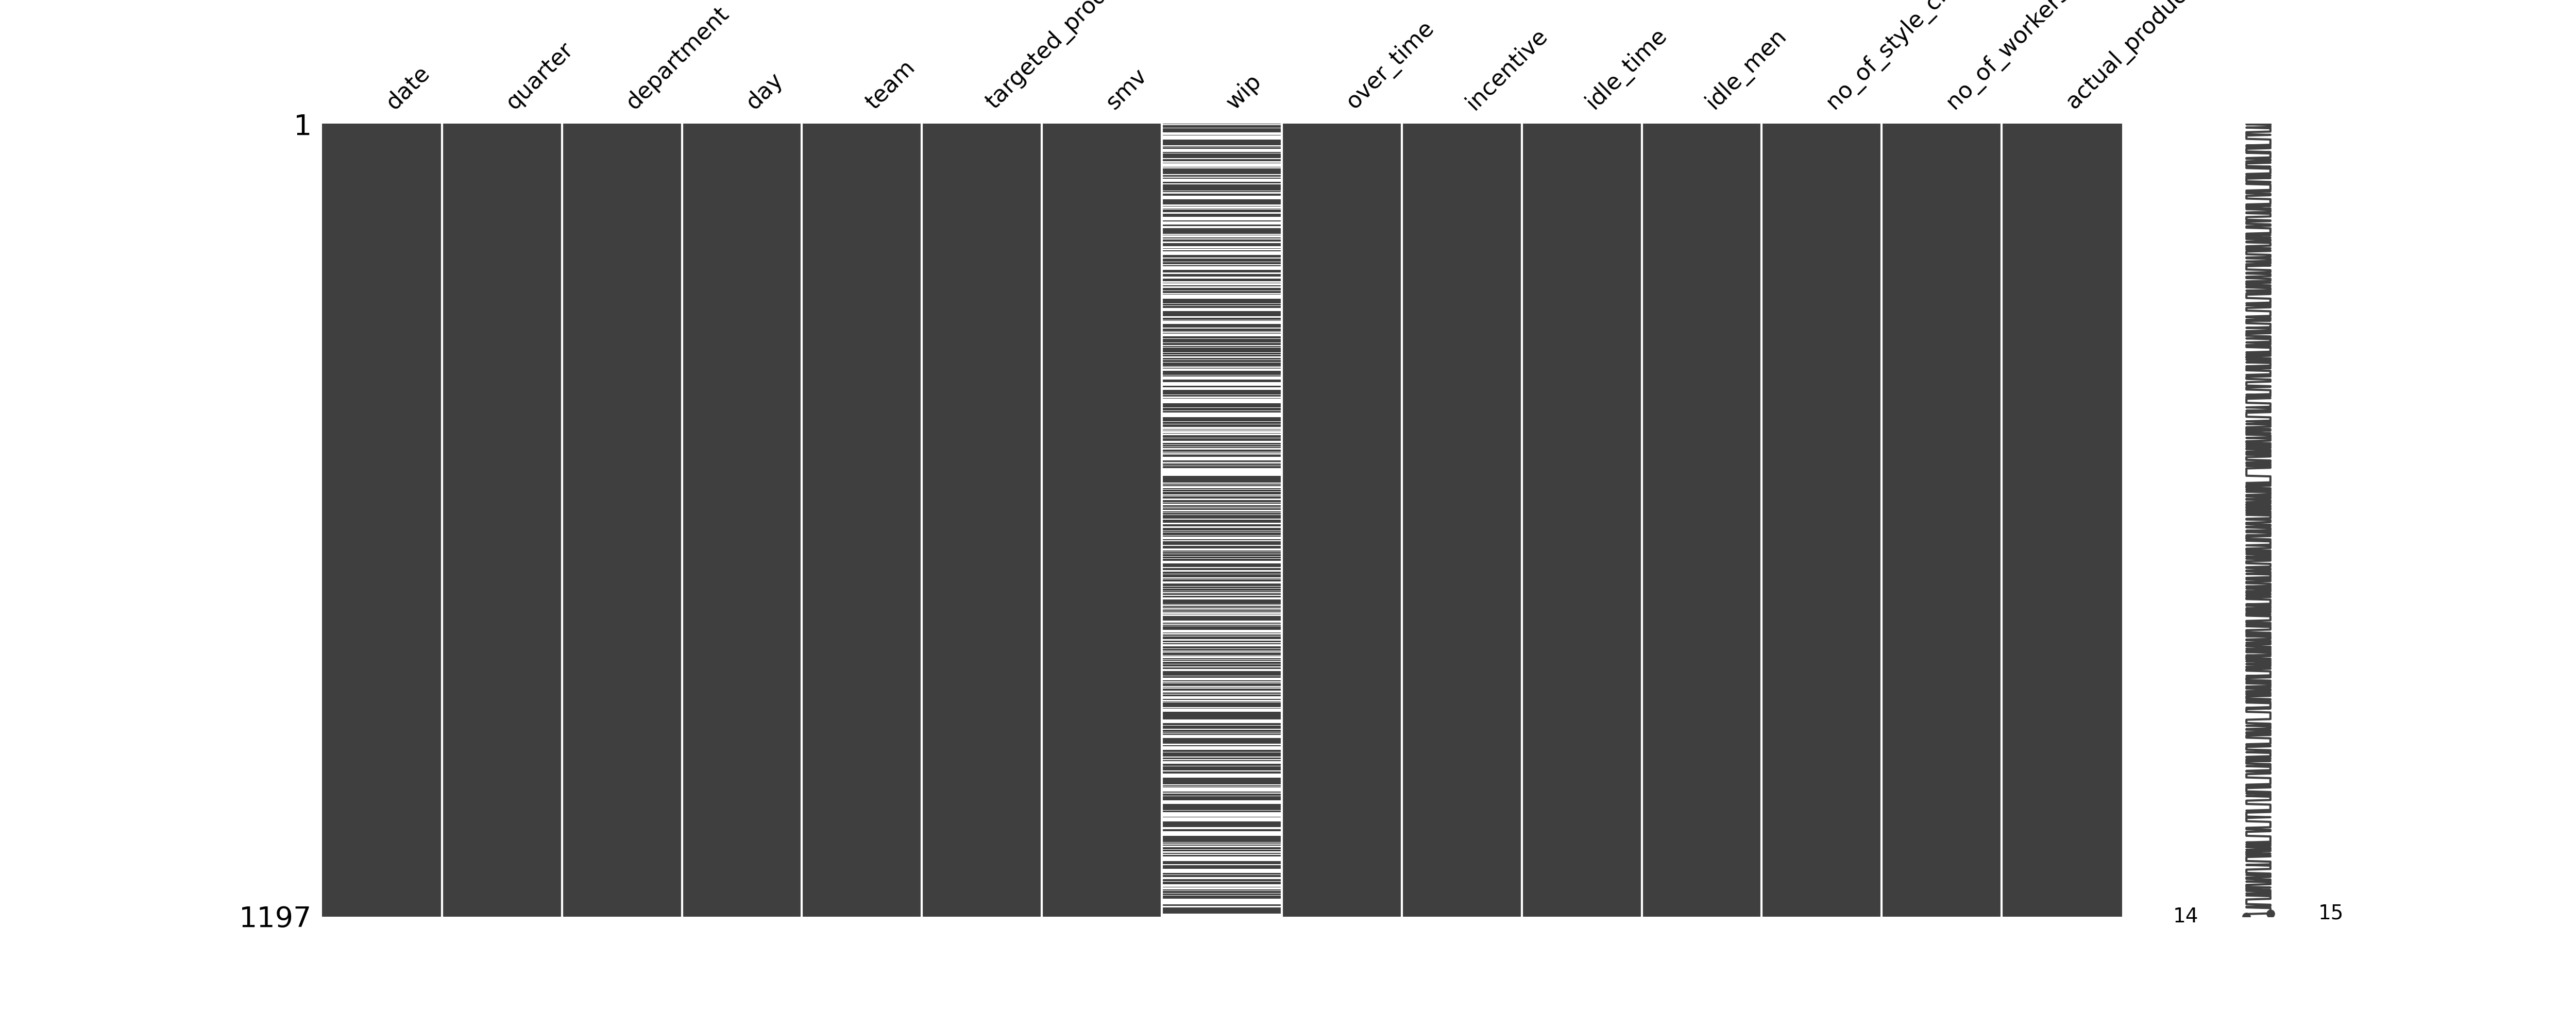

In [220]:
# Exibe visualização matricial da nulidade do dataset
ms.matrix(dataset)

O atributo **wip** será mantido no dataset e terá seus missings substituidos por zero.

In [221]:
# Substitui os missings do atributo wip por zero
dataset['wip'].fillna(0, inplace=True)

<Axes: >

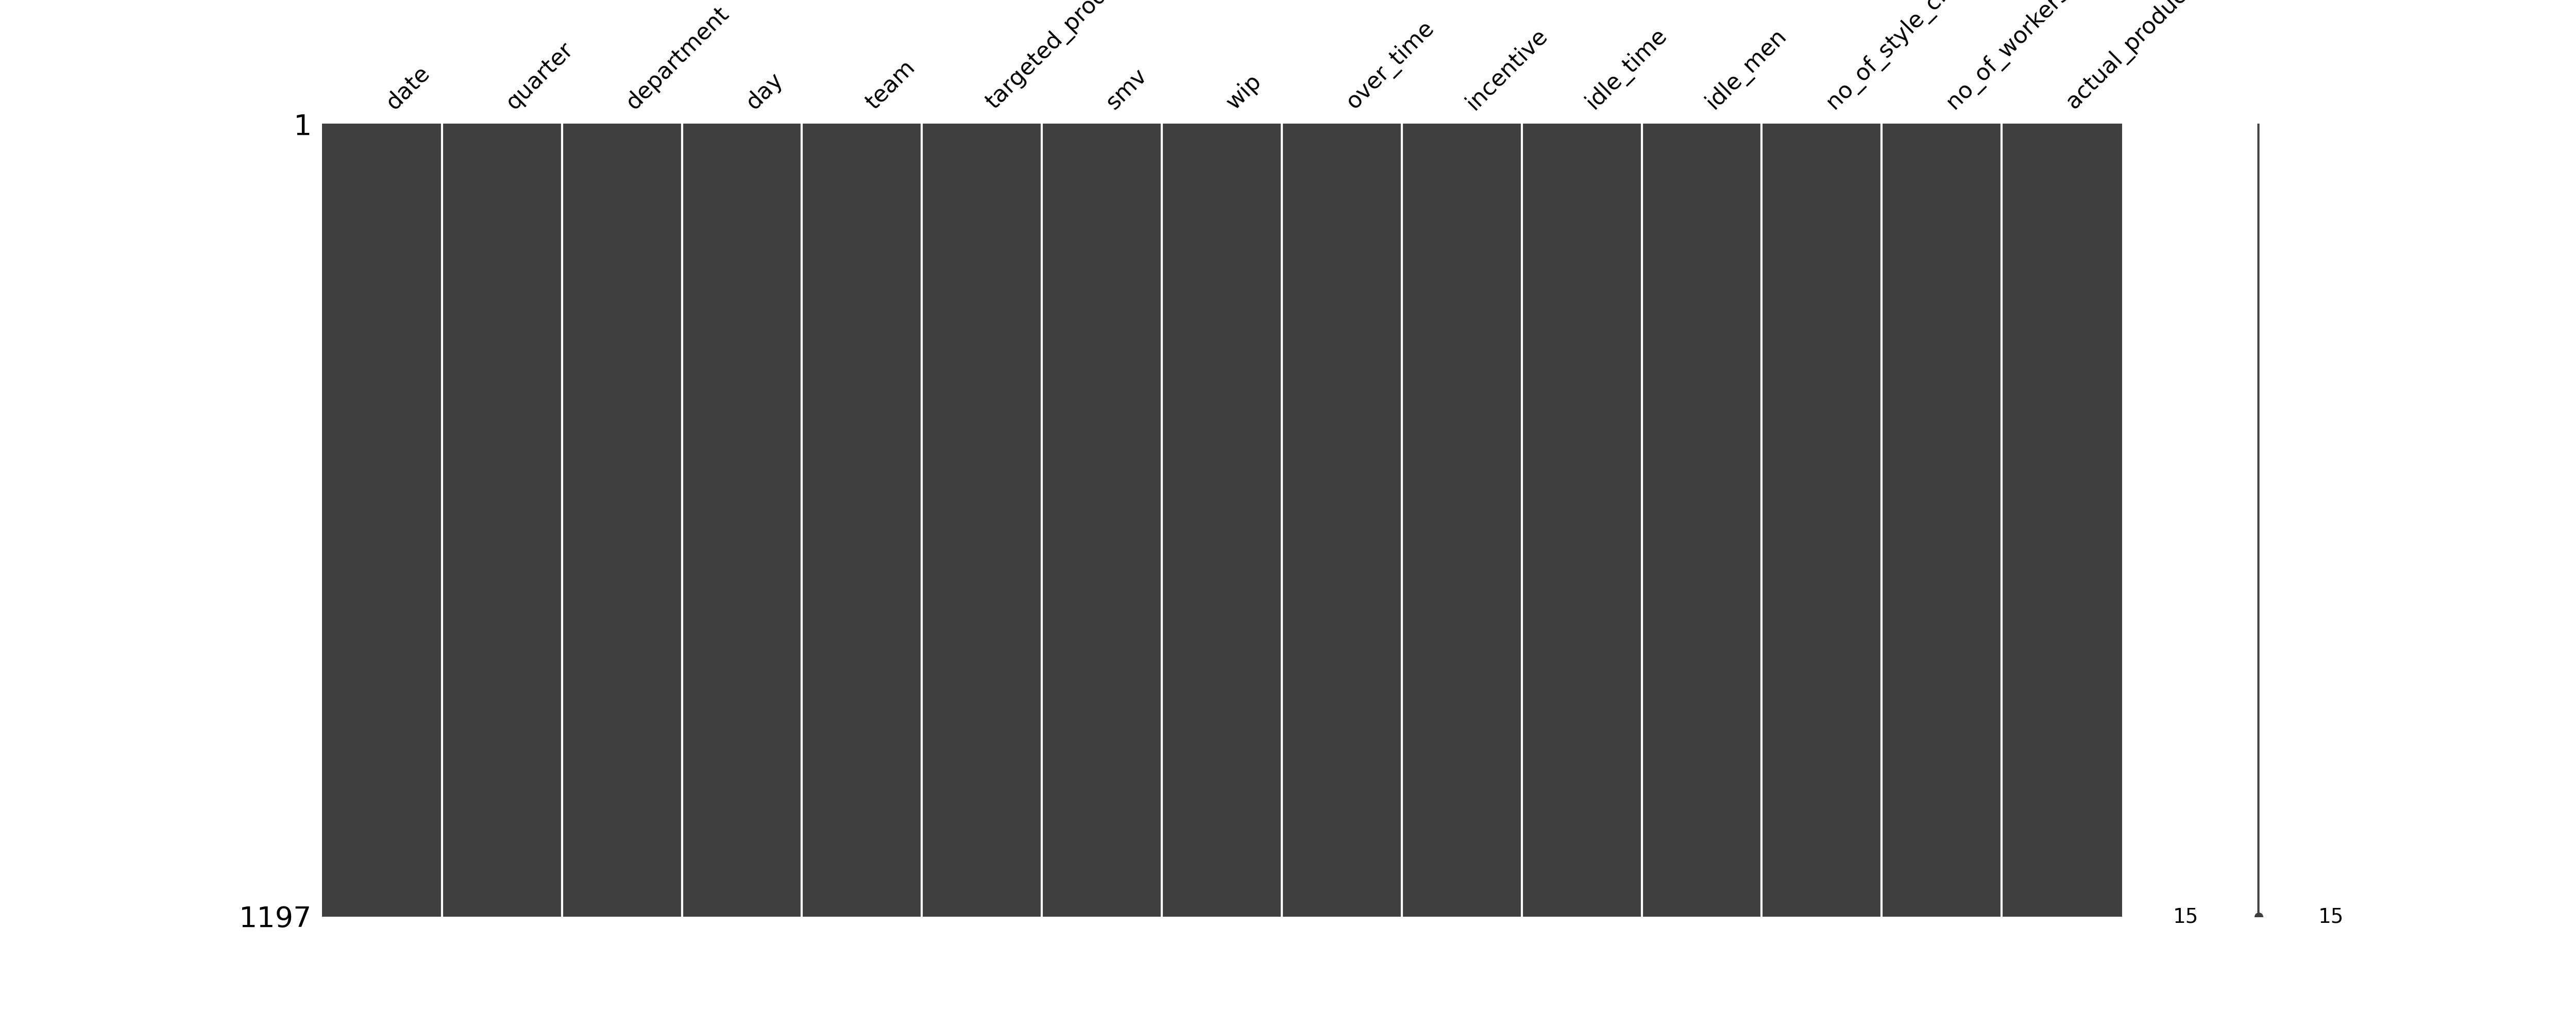

In [222]:
# Exibe visualização matricial da nulidade do dataset após a substituição das instâncias nulas do atributo wip por 0
ms.matrix(dataset)

#### Alteração de propriedades de atributos do dataset

In [223]:
# Converte o atributo date para o tipo Datetime
dataset["date"] = pd.to_datetime(dataset["date"])

#### Transformação de dados

In [224]:
# Aplica transformação nas variáveis quarter, department e day usando OneHotEncoder
ct_onehot = ColumnTransformer([("e", OneHotEncoder(sparse=False), [1,2,3])])

ct_onehot_transf = ct_onehot.fit_transform(dataset)

dt_onehot_transf = pd.DataFrame(ct_onehot_transf, columns=ct_onehot.get_feature_names_out())

In [225]:
# Concatena o dataset original com os atributos transformados e renomeia as colunas do datasete
dataset = pd.concat([dataset.reset_index(drop=True), dt_onehot_transf.reset_index(drop=True)], axis=1)

# Exclui os atributos originais que foram transformados
dataset.drop(['quarter','department','day'], inplace=True, axis=1)

dataset.rename(columns = {'e__quarter_Quarter1':'quarter_Quarter1',
'e__quarter_Quarter2':'quarter_Quarter2',
'e__quarter_Quarter3':'quarter_Quarter3',
'e__quarter_Quarter4':'quarter_Quarter4',
'e__quarter_Quarter5':'quarter_Quarter5',
'e__department_finishing':'department_finishing',
'e__department_sewing':'department_sewing',
'e__day_Monday':'day_Monday',
'e__day_Saturday':'day_Saturday',
'e__day_Sunday':'day_Sunday',
'e__day_Thursday':'day_Thursday',
'e__day_Tuesday':'day_Tuesday',
'e__day_Wednesday':'day_Wednesday'}, inplace = True)

dataset.head()

date  team  targeted_productivity    smv     wip  over_time  \
0 2015-01-01     8                   0.80  26.16  1108.0       7080   
1 2015-01-01     1                   0.75   3.94     0.0        960   
2 2015-01-01    11                   0.80  11.41   968.0       3660   
3 2015-01-01    12                   0.80  11.41   968.0       3660   
4 2015-01-01     6                   0.80  25.90  1170.0       1920   

   incentive  idle_time  idle_men  no_of_style_change  ...  quarter_Quarter4  \
0         98        0.0         0                   0  ...               0.0   
1          0        0.0         0                   0  ...               0.0   
2         50        0.0         0                   0  ...               0.0   
3         50        0.0         0                   0  ...               0.0   
4         50        0.0         0                   0  ...               0.0   

   quarter_Quarter5  department_finishing  department_sewing  day_Monday  \
0               0.0                   0.0                1.0         0.0   
1               0.0                   1.0                0.0         0.0   
2               0.0                   0.0                1.0         0.0   
3               0.0                   0.0                1.0         0.0   
4               0.0                   0.0                1.0         0.0   

   day_Saturday  day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  
0           0.0         0.0           1.0          0.0            0.0  
1           0.0         0.0           1.0          0.0            0.0  
2           0.0         0.0           1.0          0.0            0.0  
3           0.0         0.0           1.0          0.0            0.0  
4           0.0         0.0           1.0          0.0            0.0  

[5 rows x 25 columns]

In [226]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   team                   1197 non-null   int64         
 2   targeted_productivity  1197 non-null   float64       
 3   smv                    1197 non-null   float64       
 4   wip                    1197 non-null   float64       
 5   over_time              1197 non-null   int64         
 6   incentive              1197 non-null   int64         
 7   idle_time              1197 non-null   float64       
 8   idle_men               1197 non-null   int64         
 9   no_of_style_change     1197 non-null   int64         
 10  no_of_workers          1197 non-null   float64       
 11  actual_productivity    1197 non-null   float64       
 12  quarter_Quarter1       1197 non-null   float64       
 13  qua

#### Seleção de atributos

In [227]:
# Seleciona os atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Separa o dataset em componentes de input e output
X = dataset[['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']]
y = dataset['actual_productivity']

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos originais
print("\nAtributos Originais:", X.columns[0:9])

# Exibe as pontuações de cada atributo e os 4 escolhidos (com as pontuações mais altas)
np.set_printoptions(precision=2)
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=X.columns[0:9]))


Número original de atributos: 9

Número reduzido de atributos: 4

Atributos Originais: Index(['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers'],
      dtype='object')

Scores dos Atributos Originais: [1.45e+01 3.88e+01 1.57e+00 3.04e+01 1.35e+01 5.71e+03 1.45e+01 4.66e+00
 2.15e+02]

Atributos Selecionados: ['smv' 'over_time' 'idle_time' 'no_of_workers']


Resultado da seleção de atributos:

| Atributo | Pontuação |
   |---|---|
   | targeted_productivity | 1.45e+01 |
   | smv | 3.88e+01 |
   | wip | 1.57e+00 |
   | over_time | 3.04e+01 |
   | incentive | 1.35e+01 |
   | idle_time | 5.71e+03 |
   | idle_men | 1.45e+01 |
   | no_of_style_change | 4.66e+00 |
   | no_of_workers | 2.15e+02 |

Pelos resultados acima os atributos **smv** e **no_of_style_change** são os atributos que obtiveram a menor pontuação, por conta dessa baixa pontuação eles serão excluidos do dataset. 

In [228]:
# Separa o dataset em componentes de input e output e exclui os atributos smv e no_of_style_change do dataset
X = dataset.drop(['actual_productivity','smv','no_of_style_change'],axis=1)
y = dataset['actual_productivity']

print(X)
print(y)

           date  team  targeted_productivity     wip  over_time  incentive  \
0    2015-01-01     8                   0.80  1108.0       7080         98   
1    2015-01-01     1                   0.75     0.0        960          0   
2    2015-01-01    11                   0.80   968.0       3660         50   
3    2015-01-01    12                   0.80   968.0       3660         50   
4    2015-01-01     6                   0.80  1170.0       1920         50   
...         ...   ...                    ...     ...        ...        ...   
1192 2015-03-11    10                   0.75     0.0        960          0   
1193 2015-03-11     8                   0.70     0.0        960          0   
1194 2015-03-11     7                   0.65     0.0        960          0   
1195 2015-03-11     9                   0.75     0.0       1800          0   
1196 2015-03-11     6                   0.70     0.0        720          0   

      idle_time  idle_men  no_of_workers  quarter_Quarter1  ...

### Conclusão

O processo de Análise Exploratória dos Dados possibilitou levantar várias informações que permitiram aprofundar o conhecimento da operação da indústria de vestuário. A utilização de conceitos da estatística, assim como do uso de gráficos, permitiu a identificação de valores faltantes, discrepantes ou redudantes. Eles também auxiliaram na verificação da necessidade de transformações de dados. 
Durante a análise exploratória dos dados, podemos fazer o estudo da correlação entre os atributos do dataset. Desse estudo podemos verificar muitas correlações com baixo de nível associação. Mas também verificamos algumas com um correlação forte. Entre elas podemos citar a correlação entre a **targeted_productivity** e a **actual_productivity**. A correlação entre o atributo **actual_productivity** e o **smv** é fraca, mas o atributo **smv** foi mantido no modelo devido a sua forte correlação com o atributo **no_of_workers**. 
O trabalho identificou um bom conjunto de características nos dados que embasaram as atividades desenvolvidas na fase de Pré-processamento de Dados.

No Pré-processamento de Dados foram feitas as atividades de conversão de tipo de dados, tratamento de missings, redução de dimensionalidade e transformação de dados. Foi feita a atividade de conersão de dados do atributo **date** de string para datetime. O atributo **wip** era o único do dataset que apresentava missing, no seu tratamento foi feita a substituição dos missings por zero. A atividade de redução de dimensionalidade utilizou o método feature selection, através dele foi indicada uma pontuação para os atributos, e entre eles foram selecionados os atributos **smv** e **no_of_style_change** para exclusão do dataset. Nessa fase de pré-processamento fiz a transformação de dados através da discretização usando o método One-hot encoding.
Ao final das atividades acima foi feita a separação do dataset em componentes de input e output, preparando o mesmo para as próximas atividades a serem desenvolvidas para resolver esse problema de regressão
